# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [793]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

# User Defined Function

In [794]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [795]:
# To view summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [796]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [797]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

# Ingest Data  

In [798]:
df0 = pd.read_excel("World military power.xlsx", header=1)
df = df0.copy()

In [799]:
df0.head(1)

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                          1.344       Afghanistan   

   Aircraft Strength value Fighter/Interceptor Strength  \
0                      260                  Afghanistan   

   Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                   0              Afghanistan   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25                       Afghanistan   

   Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                       30            Afghanistan   

   Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                             0               Afghanistan   

   Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
0                              187                      Afghanistan   

   Attack Helicopter Fleet Strength value Tank Strength  Tank Strength value  \
0                                       0   Afghanistan                    0   

  AFV/APC Strength  AFV/APC Strength value Self-Propelled Artillery Strength  \
0      Afghanistan                    1062                       Afghanistan   

   Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                        0              Afghanistan   

   Towed Artillery Strength value Rocket Projector Strength  \
0                             176               Afghanistan   

   Rocket Projector Strength value Navy Fleet Strengths  \
0                               50          Afghanistan   

   Navy Fleet Strengths value Aircraft Carrier Fleet Strength  \
0                       0.000                     Afghanistan   

   Aircraft Carrier Fleet Strength value Submarine Fleet Strength  \
0                                  0.000              Afghanistan   

   Submarine Fleet Strength value Destroyer Fleet Strength  \
0                           0.000              Afghanistan   

   Destroyer Fleet Strength value Frigate Fleet Strength  \
0                           0.000            Afghanistan   

   Frigate Fleet Strength value defense spending budget  \
0                         0.000             Afghanistan   

  defense spending budget value External Debt External Debt value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  Airport Totals  Airport Totals value Oil Production Oil Production value  \
0    Afghanistan                    43    Afghanistan                    0   

  Oil Consumption Oil Consumption value Proven Oil Reserves  \
0     Afghanistan                  5500         Afghanistan   

  Proven Oil Reserves value Available Manpower Available Manpower value  \
0                         0        Afghanistan              1,43,25,743   

  Total Population Total Population value Total Square Land Area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  Total Square Land Area value Total Coastline Coverage  \
0                     6,52,230              Afghanistan   

  Total Coastline Coverage value Total Waterway Coverage  \
0                              0             Afghanistan   

  Total Waterway Coverage value Total Border Coverage  \
0                          1200           Afghanistan   

   Total Border Coverage value  
0                     5987.000

# EDA

## Implement basic steps to see how is your data looks like

In [800]:
df.head(3)

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                          1.344       Afghanistan   
1           Albania                          2.314           Albania   
2           Algeria                          0.466           Algeria   

   Aircraft Strength value Fighter/Interceptor Strength  \
0                      260                  Afghanistan   
1                       19                      Albania   
2                      551                      Algeria   

   Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                   0              Afghanistan   
1                                   0                  Albania   
2                                 103                  Algeria   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25                       Afghanistan   
1                               0                           Albania   
2                              22                           Algeria   

   Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                       30            Afghanistan   
1                                        0                Albania   
2                                       59                Algeria   

   Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                             0               Afghanistan   
1                             0                   Albania   
2                            87                   Algeria   

   Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
0                              187                      Afghanistan   
1                               19                          Albania   
2                              257                          Algeria   

   Attack Helicopter Fleet Strength value Tank Strength  Tank Strength value  \
0                                       0   Afghanistan                    0   
1                                       0       Albania                    0   
2                                      45       Algeria                  880   

  AFV/APC Strength  AFV/APC Strength value Self-Propelled Artillery Strength  \
0      Afghanistan                    1062                       Afghanistan   
1          Albania                     467                           Albania   
2          Algeria                    7361                           Algeria   

   Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                        0              Afghanistan   
1                                        0                  Albania   
2                                      320                  Algeria   

   Towed Artillery Strength value Rocket Projector Strength  \
0                             176               Afghanistan   
1                               0                   Albania   
2                             240                   Algeria   

   Rocket Projector Strength value Navy Fleet Strengths  \
0                               50          Afghanistan   
1                                0              Albania   
2                              316              Algeria   

   Navy Fleet Strengths value Aircraft Carrier Fleet Strength  \
0                       0.000                     Afghanistan   
1                      38.000                         Albania   
2                     201.000                         Algeria   

   Aircraft Carrier Fleet Strength value Submarine Fleet Strength  \
0                                  0.000              Afghanistan   
1                                  0.000                  Albania   
2                                  0.000                  Algeria   

   Submarine Fleet Strength value Destroyer Fleet Strength  \
0                           0.000              Afghanistan   
1                           0.000       

In [801]:
df.tail(3)

Military Strength  Military Strength Power Index Aircraft Strength  \
135             Yemen                          1.241             Yemen   
136            Zambia                          1.646            Zambia   
137          Zimbabwe                          1.758          Zimbabwe   

     Aircraft Strength value Fighter/Interceptor Strength  \
135                      169                        Yemen   
136                      108                       Zambia   
137                       90                     Zimbabwe   

     Fighter/Interceptor Strength value Attack Aircraft Strength  \
135                                  77                    Yemen   
136                                  18                   Zambia   
137                                  10                 Zimbabwe   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
135                               0                             Yemen   
136                               0                            Zambia   
137                               0                          Zimbabwe   

     Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
135                                        8                  Yemen   
136                                       11                 Zambia   
137                                       14               Zimbabwe   

     Trainer Aircraft Fleet value Helicopter Fleet Strength  \
135                            21                     Yemen   
136                            52                    Zambia   
137                            38                  Zimbabwe   

     Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
135                               61                            Yemen   
136                               27                           Zambia   
137                               28                         Zimbabwe   

     Attack Helicopter Fleet Strength value Tank Strength  \
135                                      14         Yemen   
136                                       0        Zambia   
137                                       6      Zimbabwe   

     Tank Strength value AFV/APC Strength  AFV/APC Strength value  \
135                  620            Yemen                     615   
136                   75           Zambia                     184   
137                   42         Zimbabwe                     300   

    Self-Propelled Artillery Strength  \
135                             Yemen   
136                            Zambia   
137                          Zimbabwe   

     Self-Propelled Artillery Strength value Towed Artillery Strength  \
135                                       20                    Yemen   
136                                        0                   Zambia   
137                                        0                 Zimbabwe   

     Towed Artillery Strength value Rocket Projector Strength  \
135                              85                     Yemen   
136                              42                    Zambia   
137                              65                  Zimbabwe   

     Rocket Projector Strength value Navy Fleet Strengths  \
135                              150                Yemen   
136                               50               Zambia   
137                               22             Zimbabwe   

     Navy Fleet Strengths value Aircraft Carrier Fleet Strength  \
135                      30.000                           Yemen   
136                       0.000                          Zambia   
137                       0.000                        Zimbabwe   

     Aircraft Carrier Fleet Strength value Submarine Fleet Strength  \
135                                  0.000                    Yemen   
136                                  0.000                   Zambia   
137                                  0.000                 Zimbabwe   

     Submarine Fleet Stre

In [802]:
df.sample(10)

Military Strength  Military Strength Power Index Aircraft Strength  \
84          Nicaragua                          2.275         Nicaragua   
50          Indonesia                          0.254         Indonesia   
74            Moldova                          2.129           Moldova   
24               Chad                          1.638              Chad   
136            Zambia                          1.646            Zambia   
6           Australia                          0.323         Australia   
52               Iraq                          0.791              Iraq   
47           Honduras                          2.094          Honduras   
3              Angola                          0.838            Angola   
22             Canada                          0.371            Canada   

     Aircraft Strength value Fighter/Interceptor Strength  \
84                        19                    Nicaragua   
50                       462                    Indonesia   
74                         3                      Moldova   
24                        35                         Chad   
136                      108                       Zambia   
6                        464                    Australia   
52                       348                         Iraq   
47                        46                     Honduras   
3                        295                       Angola   
22                       385                       Canada   

     Fighter/Interceptor Strength value Attack Aircraft Strength  \
84                                    0                Nicaragua   
50                                   41                Indonesia   
74                                    0                  Moldova   
24                                    0                     Chad   
136                                  18                   Zambia   
6                                    82                Australia   
52                                   26                     Iraq   
47                                    3                 Honduras   
3                                    72                   Angola   
22                                   62                   Canada   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
84                                0                         Nicaragua   
50                               39                         Indonesia   
74                                0                           Moldova   
24                                6                              Chad   
136                               0                            Zambia   
6                                 6                         Australia   
52                               33                              Iraq   
47                                9                          Honduras   
3                                18                            Angola   
22                                0                            Canada   

     Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
84                                         5              Nicaragua   
50                                        54              Indonesia   
74                                         1                Moldova   
24                                         6                   Chad   
136                                       11                 Zambia   
6                                         38              Australia   
52                                        16                   Iraq   
47                                        11               Honduras   
3                                         30                 Angola   
22                                        38                 Canada   

     Trainer Aircraft Fleet value Helicopter Fleet Strength  \
84                              1                 Nicaragua   
50                            109                 Indone

In [803]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [804]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [805]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter/interceptor_strength', 'fighter/interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [806]:
df.shape

(138, 60)

In [807]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 138 observation and 60 columns in the dataset


In [808]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength                        138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength                        138 non-null    object 
 3   aircraft_strength_value                  138 non-null    int64  
 4   fighter/interceptor_strength             138 non-null    object 
 5   fighter/interceptor_strength_value       138 non-null    int64  
 6   attack_aircraft_strength                 138 non-null    object 
 7   attack_aircraft_strength_value           138 non-null    int64  
 8   transport_aircraft_fleet_strength        138 non-null    object 
 9   transport_aircraft_fleet_strength_value  138 non-null    int64  
 10  trainer_aircraft_fleet                   138 non-n

In [809]:
df.describe().T

count     mean      std    min  \
military_strength_power_index           138.000    1.461    1.324  0.061   
aircraft_strength_value                 138.000  388.471 1231.982  0.000   
fighter/interceptor_strength_value      138.000   81.565  230.325  0.000   
attack_aircraft_strength_value          138.000   25.761   94.528  0.000   
transport_aircraft_fleet_strength_value 138.000   30.232   92.330  0.000   
trainer_aircraft_fleet_value            138.000   82.833  240.804  0.000   
helicopter_fleet_strength_value         138.000  154.065  520.184  0.000   
attack_helicopter_fleet_strength_value  138.000   25.623   97.326  0.000   
tank_strength_value                     138.000  646.565 1515.464  0.000   
afv/apc_strength_value                  138.000 2485.696 5410.546  0.000   
self-propelled_artillery_strength_value 138.000  212.159  688.029  0.000   
towed_artillery_strength_value          138.000  393.978  805.782  0.000   
rocket_projector_strength_value         138.000  156.935  484.381  0.000   
navy_fleet_strengths_value              124.000   84.984  146.114  0.000   
aircraft_carrier_fleet_strength_value   115.000    0.383    1.972  0.000   
submarine_fleet_strength_value          115.000    4.800   13.707  0.000   
destroyer_fleet_strength_value          115.000    2.052   10.001  0.000   
frigate_fleet_strength_value            115.000    3.522    6.481  0.000   
airport_totals_value                    138.000  290.043 1212.967  2.000   
total_border_coverage_value             129.000 3964.225 3760.100 29.000   

                                             25%      50%      75%       max  
military_strength_power_index              0.575    1.034    2.022    10.168  
aircraft_strength_value                   33.000  111.000  290.250 13264.000  
fighter/interceptor_strength_value         0.000   17.000   60.500  2085.000  
attack_aircraft_strength_value             0.000    0.000   15.750   742.000  
transport_aircraft_fleet_strength_value    3.000    9.000   26.000   945.000  
trainer_aircraft_fleet_value               4.250   26.000   79.250  2643.000  
helicopter_fleet_strength_value           15.250   44.000  126.750  5768.000  
attack_helicopter_fleet_strength_value     0.000    2.000   17.750   967.000  
tank_strength_value                       19.250  153.000  436.250 12950.000  
afv/apc_strength_value                   250.250  734.500 2000.000 39253.000  
self-propelled_artillery_strength_value    0.000   23.000   97.250  6083.000  
towed_artillery_strength_value            24.250  108.000  296.500  4465.000  
rocket_projector_strength_value            0.000   24.000   99.750  3860.000  
navy_fleet_strengths_value                10.000   38.000   77.750   984.000  
aircraft_carrier_fleet_strength_value      0.000    0.000    0.000    20.000  
submarine_fleet_strength_value             0.000    0.000    4.000    83.000  
destroyer_fleet_strength_value             0.000    0.000    0.000    91.000  
frigate_fleet_strength_value               0.000    0.000    5.500    52.000  
airport_totals_value                      33.500   68.000  150.750 13513.000  
total_border_coverage_value             1587.000 2816.000 5267.000 22457.000

In [810]:
df.describe(include=object).T

count unique                 top freq
military_strength                   138    138            Paraguay    1
aircraft_strength                   138    138            Paraguay    1
fighter/interceptor_strength        138    138            Paraguay    1
attack_aircraft_strength            138    138            Paraguay    1
transport_aircraft_fleet_strength   138    138            Paraguay    1
trainer_aircraft_fleet              138    138            Paraguay    1
helicopter_fleet_strength           138    138            Paraguay    1
attack_helicopter_fleet_strength    138    138            Paraguay    1
tank_strength                       138    138            Paraguay    1
afv/apc_strength                    138    138            Paraguay    1
self-propelled_artillery_strength   138    138            Paraguay    1
towed_artillery_strength            138    138            Paraguay    1
rocket_projector_strength           138    138            Paraguay    1
navy_fleet_strengths                124    124            Paraguay    1
aircraft_carrier_fleet_strength     115    115            Paraguay    1
submarine_fleet_strength            115    115            Paraguay    1
destroyer_fleet_strength            115    115            Paraguay    1
frigate_fleet_strength              115    115            Paraguay    1
defense_spending_budget             138    138            Paraguay    1
defense_spending_budget_value       138    124      2,50,00,00,000    3
external_debt                       138    138            Paraguay    1
external_debt_value                 138    138  15,98,00,00,00,000    1
airport_totals                      138    138            Paraguay    1
oil_production                      138    138            Paraguay    1
oil_production_value                138     88                   0   46
oil_consumption                     138    138            Paraguay    1
oil_consumption_value               138    102               18500    4
proven_oil_reserves                 138    138            Paraguay    1
proven_oil_reserves_value           138     84                   0   46
available_manpower                  138    138            Paraguay    1
available_manpower_value            138    138           35,52,871    1
total_population                    138    138            Paraguay    1
total_population_value              138    138           61,87,271    1
total_square_land_area              138    138            Paraguay    1
total_square_land_area_value        138    138            2,36,800    1
total_coastline_coverage            109    109               China    1
total_coastline_coverage_value      109    104                 193    2
total_waterway_coverage             138    138            Paraguay    1
total_waterway_coverage_value       138     92                   0   38
total_border_coverage               129    129            Paraguay    1

In [811]:
df.nunique()

military_strength                          138
military_strength_power_index              138
aircraft_strength                          138
aircraft_strength_value                    113
fighter/interceptor_strength               138
fighter/interceptor_strength_value          63
attack_aircraft_strength                   138
attack_aircraft_strength_value              38
transport_aircraft_fleet_strength          138
transport_aircraft_fleet_strength_value     49
trainer_aircraft_fleet                     138
trainer_aircraft_fleet_value                77
helicopter_fleet_strength                  138
helicopter_fleet_strength_value             97
attack_helicopter_fleet_strength           138
attack_helicopter_fleet_strength_value      45
tank_strength                              138
tank_strength_value                        106
afv/apc_strength                           138
afv/apc_strength_value                     130
self-propelled_artillery_strength          138
self-propelle

In [812]:
# to find how many unique values object features have
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

military_strength_power_index has 138 unique value
aircraft_strength_value has 113 unique value
fighter/interceptor_strength_value has 63 unique value
attack_aircraft_strength_value has 38 unique value
transport_aircraft_fleet_strength_value has 49 unique value
trainer_aircraft_fleet_value has 77 unique value
helicopter_fleet_strength_value has 97 unique value
attack_helicopter_fleet_strength_value has 45 unique value
tank_strength_value has 106 unique value
afv/apc_strength_value has 130 unique value
self-propelled_artillery_strength_value has 70 unique value
towed_artillery_strength_value has 91 unique value
rocket_projector_strength_value has 68 unique value
navy_fleet_strengths_value has 78 unique value
aircraft_carrier_fleet_strength_value has 5 unique value
submarine_fleet_strength_value has 20 unique value
destroyer_fleet_strength_value has 11 unique value
frigate_fleet_strength_value has 18 unique value
airport_totals_value has 108 unique value
total_border_coverage_value has 1

In [813]:
df.duplicated().value_counts()

False    138
dtype: int64

## Convert multi index columns to one level

In [814]:
df.head(1)

military_strength  military_strength_power_index aircraft_strength  \
0       Afghanistan                          1.344       Afghanistan   

   aircraft_strength_value fighter/interceptor_strength  \
0                      260                  Afghanistan   

   fighter/interceptor_strength_value attack_aircraft_strength  \
0                                   0              Afghanistan   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   

   trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                             0               Afghanistan   

   helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                              187                      Afghanistan   

   attack_helicopter_fleet_strength_value tank_strength  tank_strength_value  \
0                                       0   Afghanistan                    0   

  afv/apc_strength  afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                    1062                       Afghanistan   

   self-propelled_artillery_strength_value towed_artillery_strength  \
0                                        0              Afghanistan   

   towed_artillery_strength_value rocket_projector_strength  \
0                             176               Afghanistan   

   rocket_projector_strength_value navy_fleet_strengths  \
0                               50          Afghanistan   

   navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                       0.000                     Afghanistan   

   aircraft_carrier_fleet_strength_value submarine_fleet_strength  \
0                                  0.000              Afghanistan   

   submarine_fleet_strength_value destroyer_fleet_strength  \
0                           0.000              Afghanistan   

   destroyer_fleet_strength_value frigate_fleet_strength  \
0                           0.000            Afghanistan   

   frigate_fleet_strength_value defense_spending_budget  \
0                         0.000             Afghanistan   

  defense_spending_budget_value external_debt external_debt_value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  airport_totals  airport_totals_value oil_production oil_production_value  \
0    Afghanistan                    43    Afghanistan                    0   

  oil_consumption oil_consumption_value proven_oil_reserves  \
0     Afghanistan                  5500         Afghanistan   

  proven_oil_reserves_value available_manpower available_manpower_value  \
0                         0        Afghanistan              1,43,25,743   

  total_population total_population_value total_square_land_area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  total_square_land_area_value total_coastline_coverage  \
0                     6,52,230              Afghanistan   

  total_coastline_coverage_value total_waterway_coverage  \
0                              0             Afghanistan   

  total_waterway_coverage_value total_border_coverage  \
0                          1200           Afghanistan   

   total_border_coverage_value  
0                     5987.000

In [815]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [816]:
df.head(1)

country  military_strength_power_index aircraft_strength  \
0  Afghanistan                          1.344       Afghanistan   

   aircraft_strength_value fighter/interceptor_strength  \
0                      260                  Afghanistan   

   fighter/interceptor_strength_value attack_aircraft_strength  \
0                                   0              Afghanistan   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   

   trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                             0               Afghanistan   

   helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                              187                      Afghanistan   

   attack_helicopter_fleet_strength_value tank_strength  tank_strength_value  \
0                                       0   Afghanistan                    0   

  afv/apc_strength  afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                    1062                       Afghanistan   

   self-propelled_artillery_strength_value towed_artillery_strength  \
0                                        0              Afghanistan   

   towed_artillery_strength_value rocket_projector_strength  \
0                             176               Afghanistan   

   rocket_projector_strength_value navy_fleet_strengths  \
0                               50          Afghanistan   

   navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                       0.000                     Afghanistan   

   aircraft_carrier_fleet_strength_value submarine_fleet_strength  \
0                                  0.000              Afghanistan   

   submarine_fleet_strength_value destroyer_fleet_strength  \
0                           0.000              Afghanistan   

   destroyer_fleet_strength_value frigate_fleet_strength  \
0                           0.000            Afghanistan   

   frigate_fleet_strength_value defense_spending_budget  \
0                         0.000             Afghanistan   

  defense_spending_budget_value external_debt external_debt_value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  airport_totals  airport_totals_value oil_production oil_production_value  \
0    Afghanistan                    43    Afghanistan                    0   

  oil_consumption oil_consumption_value proven_oil_reserves  \
0     Afghanistan                  5500         Afghanistan   

  proven_oil_reserves_value available_manpower available_manpower_value  \
0                         0        Afghanistan              1,43,25,743   

  total_population total_population_value total_square_land_area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  total_square_land_area_value total_coastline_coverage  \
0                     6,52,230              Afghanistan   

  total_coastline_coverage_value total_waterway_coverage  \
0                              0             Afghanistan   

  total_waterway_coverage_value total_border_coverage  \
0                          1200           Afghanistan   

   total_border_coverage_value  
0                     5987.000

In [817]:
#df = df.reset_index()
#del df['index']

In [818]:
#df.head(1)

In [819]:
#df.set_index('country', inplace=True)

In [820]:
#df.head(1)

## Detect and drop duplicated columns

In [821]:
df.columns

Index(['country', 'military_strength_power_index', 'aircraft_strength',
       'aircraft_strength_value', 'fighter/interceptor_strength',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength',
       'attack_aircraft_strength_value', 'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',
       'aircraft_

In [822]:
drop_columns = ['aircraft_strength',
               'fighter/interceptor_strength',
               'attack_aircraft_strength',
               'transport_aircraft_fleet_strength',
               'trainer_aircraft_fleet',
               'helicopter_fleet_strength',
               'attack_helicopter_fleet_strength',
               'tank_strength',
               'afv/apc_strength',
               'self-propelled_artillery_strength',
               'towed_artillery_strength',
               'rocket_projector_strength',
               'navy_fleet_strengths',
               'aircraft_carrier_fleet_strength',
               'submarine_fleet_strength',
               'destroyer_fleet_strength',
               'frigate_fleet_strength',
               'defense_spending_budget',
               'external_debt',
               'airport_totals', 
               'oil_production',
               'oil_consumption',
               'proven_oil_reserves',
               'available_manpower',
               'total_population',
               'total_square_land_area',
               'total_coastline_coverage',
               'total_waterway_coverage',
               'total_border_coverage',
               ]

In [823]:
df.drop(drop_columns, axis = 1, inplace = True)

In [824]:
df.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

  defense_spending_budget_value external_debt_value  airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                    43   

  oil_production_value oil_consumption_value proven_oil_reserves_value  \
0                    0                  5500                         0   

  available_manpower_value total_population_value  \
0              1,43,25,743            3,49,40,837   

  total_square_land_area_value total_coastline_coverage_value  \
0                     6,52,230                              0   

  total_waterway_coverage_value  total_border_coverage_value  
0                          1200                     5987.000

In [825]:
df.shape

(138, 31)

In [826]:
# drop_columns = []
# for i in range(2, df.shape[1], 2):
#     drop_columns.append(df.columns[i])
# df.drop(drop_columns, axis= 1, inplace= True)

In [827]:
# df = df.T.drop_duplicates().T

## Check for missing values 

In [828]:
missing (df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                       29            0.210
aircraft_carrier_fleet_strength_value                23            0.167
frigate_fleet_strength_value                         23            0.167
destroyer_fleet_strength_value                       23            0.167
submarine_fleet_strength_value                       23            0.167
navy_fleet_strengths_value                           14            0.101
total_border_coverage_value                           9            0.065
helicopter_fleet_strength_value                       0            0.000
attack_helicopter_fleet_strength_value                0            0.000
total_waterway_coverage_value                         0            0.000
aircraft_strength_value                               0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
fighter/interceptor_strength_value                    0            0.000
attack_aircraft_strength_value                        0            0.000
transport_aircraft_fleet_strength_value               0            0.000
military_strength_power_index                         0            0.000
trainer_aircraft_fleet_value                          0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
country                                               0            0.000

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [829]:
# submarine_fleet_strength_value : South Korea --> 22
# frigate_fleet_strength_value : South Korea --> 4
# destroyer_fleet_strength_value : South Korea --> 12

In [830]:
df.loc[(df['country']=="South Korea") & (df['submarine_fleet_strength_value'].isnull()), 'submarine_fleet_strength_value'] = 22

In [831]:
df.loc[(df['country']=="South Korea") & (df['frigate_fleet_strength_value'].isnull()), 'frigate_fleet_strength_value'] = 4

In [832]:
df.loc[(df['country']=="South Korea") & (df['destroyer_fleet_strength_value'].isnull()), 'destroyer_fleet_strength_value'] = 12

In [833]:
missing (df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                       29            0.210
aircraft_carrier_fleet_strength_value                23            0.167
frigate_fleet_strength_value                         22            0.159
destroyer_fleet_strength_value                       22            0.159
submarine_fleet_strength_value                       22            0.159
navy_fleet_strengths_value                           14            0.101
total_border_coverage_value                           9            0.065
helicopter_fleet_strength_value                       0            0.000
attack_helicopter_fleet_strength_value                0            0.000
total_waterway_coverage_value                         0            0.000
aircraft_strength_value                               0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
fighter/interceptor_strength_value                    0            0.000
attack_aircraft_strength_value                        0            0.000
transport_aircraft_fleet_strength_value               0            0.000
military_strength_power_index                         0            0.000
trainer_aircraft_fleet_value                          0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
country                                               0            0.000

In [834]:
df.fillna(0, inplace=True)

In [835]:
missing (df)

Missing_Number  Missing_Percent
country                                               0            0.000
submarine_fleet_strength_value                        0            0.000
total_waterway_coverage_value                         0            0.000
total_coastline_coverage_value                        0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
frigate_fleet_strength_value                          0            0.000
destroyer_fleet_strength_value                        0            0.000
aircraft_carrier_fleet_strength_value                 0            0.000
military_strength_power_index                         0            0.000
navy_fleet_strengths_value                            0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
attack_helicopter_fleet_strength_value                0            0.000
helicopter_fleet_strength_value                       0            0.000
trainer_aircraft_fleet_value                          0            0.000
transport_aircraft_fleet_strength_value               0            0.000
attack_aircraft_strength_value                        0            0.000
fighter/interceptor_strength_value                    0            0.000
aircraft_strength_value                               0            0.000
total_border_coverage_value                           0            0.000

In [836]:
df = df.reset_index()   # df = df.reset_index(drop = True)
del df['index']

In [837]:
df.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

  defense_spending_budget_value external_debt_value  airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                    43   

  oil_production_value oil_consumption_value proven_oil_reserves_value  \
0                    0                  5500                         0   

  available_manpower_value total_population_value  \
0              1,43,25,743            3,49,40,837   

  total_square_land_area_value total_coastline_coverage_value  \
0                     6,52,230                              0   

  total_waterway_coverage_value  total_border_coverage_value  
0                          1200                     5987.000

In [838]:
df.set_index('country', inplace=True)

In [839]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value defense_spending_budget_value  \
country                                                                   
Afghanistan                         0.000               12,00,00,00,000   

            external_debt_value  airport_totals_value oil_production_value  \
country                                                                      
Afghanistan      2,84,00,00,000                    43                    0   

            oil_consumption_value proven_oil_reserves_value  \
country                                                       
Afghanistan                  5500                         0   

            available_manpower_value total_population_value  \
country                                                       
Afghanistan              1,43,25,743            3,49,40,837   

            total_square_land_area_value total_coastline_coverage_value  \
country                                                                   
Afghanistan                     6,52,230                              0   

            total_waterway_coverage_value  total_border_coverage_value  
country                                                                 
Afghanistan                          1200                     5987.000

In [840]:
df.shape

(138, 30)

## Fix the dtypes

In [841]:
df.dtypes

military_strength_power_index              float64
aircraft_strength_value                      int64
fighter/interceptor_strength_value           int64
attack_aircraft_strength_value               int64
transport_aircraft_fleet_strength_value      int64
trainer_aircraft_fleet_value                 int64
helicopter_fleet_strength_value              int64
attack_helicopter_fleet_strength_value       int64
tank_strength_value                          int64
afv/apc_strength_value                       int64
self-propelled_artillery_strength_value      int64
towed_artillery_strength_value               int64
rocket_projector_strength_value              int64
navy_fleet_strengths_value                 float64
aircraft_carrier_fleet_strength_value      float64
submarine_fleet_strength_value             float64
destroyer_fleet_strength_value             float64
frigate_fleet_strength_value               float64
defense_spending_budget_value               object
external_debt_value            

In [842]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value defense_spending_budget_value  \
country                                                                   
Afghanistan                         0.000               12,00,00,00,000   

            external_debt_value  airport_totals_value oil_production_value  \
country                                                                      
Afghanistan      2,84,00,00,000                    43                    0   

            oil_consumption_value proven_oil_reserves_value  \
country                                                       
Afghanistan                  5500                         0   

            available_manpower_value total_population_value  \
country                                                       
Afghanistan              1,43,25,743            3,49,40,837   

            total_square_land_area_value total_coastline_coverage_value  \
country                                                                   
Afghanistan                     6,52,230                              0   

            total_waterway_coverage_value  total_border_coverage_value  
country                                                                 
Afghanistan                          1200                     5987.000

In [843]:
for col in df.columns:
    if df.dtypes[col] == np.object:
        df[col] = df[col].apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")

In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    int64  
 2   fighter/interceptor_strength_value       138 non-null    int64  
 3   attack_aircraft_strength_value           138 non-null    int64  
 4   transport_aircraft_fleet_strength_value  138 non-null    int64  
 5   trainer_aircraft_fleet_value             138 non-null    int64  
 6   helicopter_fleet_strength_value          138 non-null    int64  
 7   attack_helicopter_fleet_strength_value   138 non-null    int64  
 8   tank_strength_value                      138 non-null    int64  
 9   afv/apc_strength_value                   138 non-null    int64  
 10  self-propelled_artillery_strength_value 

In [845]:
missing(df)

Missing_Number  Missing_Percent
military_strength_power_index                         0            0.000
aircraft_strength_value                               0            0.000
total_waterway_coverage_value                         0            0.000
total_coastline_coverage_value                        0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
frigate_fleet_strength_value                          0            0.000
destroyer_fleet_strength_value                        0            0.000
submarine_fleet_strength_value                        0            0.000
aircraft_carrier_fleet_strength_value                 0            0.000
navy_fleet_strengths_value                            0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
attack_helicopter_fleet_strength_value                0            0.000
helicopter_fleet_strength_value                       0            0.000
trainer_aircraft_fleet_value                          0            0.000
transport_aircraft_fleet_strength_value               0            0.000
attack_aircraft_strength_value                        0            0.000
fighter/interceptor_strength_value                    0            0.000
total_border_coverage_value                           0            0.000

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [846]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                         0.000                12000000000.000   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan       2840000000.000                    43                 0.000   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan               5500.000                      0.000   

             available_manpower_value  total_population_value  \
country                                                         
Afghanistan              14325743.000            34940837.000   

             total_square_land_area_value  total_coastline_coverage_value  \
country                                                                     
Afghanistan                    652230.000                           0.000   

             total_waterway_coverage_value  total_border_coverage_value  
country                                                                  
Afghanistan                       1200.000                     5987.000

In [847]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       '

In [848]:
df.shape

(138, 30)

In [849]:
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].min() == 0:
        print(col)

aircraft_strength_value
fighter/interceptor_strength_value
attack_aircraft_strength_value
transport_aircraft_fleet_strength_value
trainer_aircraft_fleet_value
helicopter_fleet_strength_value
attack_helicopter_fleet_strength_value
tank_strength_value
afv/apc_strength_value
self-propelled_artillery_strength_value
towed_artillery_strength_value
rocket_projector_strength_value
navy_fleet_strengths_value
aircraft_carrier_fleet_strength_value
submarine_fleet_strength_value
destroyer_fleet_strength_value
frigate_fleet_strength_value
oil_production_value
proven_oil_reserves_value
total_coastline_coverage_value
total_waterway_coverage_value
total_border_coverage_value


In [850]:
# Georeferences

# "total_coastline_coverage_value"
# "total_waterway_coverage_value"
# "total_border_coverage_value"
# "total_square_land_area_value"

In [851]:
df[df["total_coastline_coverage_value"]==0]["total_coastline_coverage_value"]

country
Afghanistan                0.000
Armenia                    0.000
Austria                    0.000
Belarus                    0.000
Bhutan                     0.000
Bolivia                    0.000
Botswana                   0.000
Burkina Faso               0.000
Central African Republic   0.000
Chad                       0.000
Czechia                    0.000
Ethiopia                   0.000
Hungary                    0.000
Kyrgyzstan                 0.000
Laos                       0.000
Mali                       0.000
Moldova                    0.000
Mongolia                   0.000
Nepal                      0.000
Niger                      0.000
North Macedonia            0.000
Paraguay                   0.000
Serbia                     0.000
Slovakia                   0.000
South Sudan                0.000
Switzerland                0.000
Tajikistan                 0.000
Uganda                     0.000
Zambia                     0.000
Zimbabwe                   0.000
Na

In [852]:
df[df["total_waterway_coverage_value"]==0]["total_waterway_coverage_value"]

country
Algeria                  0.000
Armenia                  0.000
Austria                  0.000
Azerbaijan               0.000
Bahrain                  0.000
Bhutan                   0.000
Bosnia and Herzegovina   0.000
Botswana                 0.000
Burkina Faso             0.000
Cameroon                 0.000
Chad                     0.000
El Salvador              0.000
Israel                   0.000
Kazakhstan               0.000
Kenya                    0.000
Kuwait                   0.000
Liberia                  0.000
Libya                    0.000
Mali                     0.000
Mauritania               0.000
Montenegro               0.000
Morocco                  0.000
Namibia                  0.000
Nepal                    0.000
New Zealand              0.000
Oman                     0.000
Qatar                    0.000
Saudi Arabia             0.000
Slovenia                 0.000
Somalia                  0.000
South Africa             0.000
South Sudan              0.000


In [853]:
df[df["total_border_coverage_value"]==0]["total_border_coverage_value"]

country
Australia     0.000
Bahrain       0.000
Japan         0.000
Madagascar    0.000
New Zealand   0.000
Philippines   0.000
Singapore     0.000
Sri Lanka     0.000
Taiwan        0.000
Name: total_border_coverage_value, dtype: float64

In [854]:
df[df["total_square_land_area_value"]==0]["total_square_land_area_value"]

Series([], Name: total_square_land_area_value, dtype: float64)

In [855]:
drop_columns = ["total_coastline_coverage_value",
               "total_waterway_coverage_value",
               "total_border_coverage_value",
               "total_square_land_area_value"]

In [856]:
df.drop(drop_columns, axis = 1, inplace = True)

In [857]:
df.shape

(138, 26)

In [858]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value'],
      dtype='object')

## Visualy inspect the some features

In [859]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                         0.000                12000000000.000   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan       2840000000.000                    43                 0.000   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan               5500.000                      0.000   

             available_manpower_value  total_population_value  
country                                                        
Afghanistan              14325743.000            34940837.000

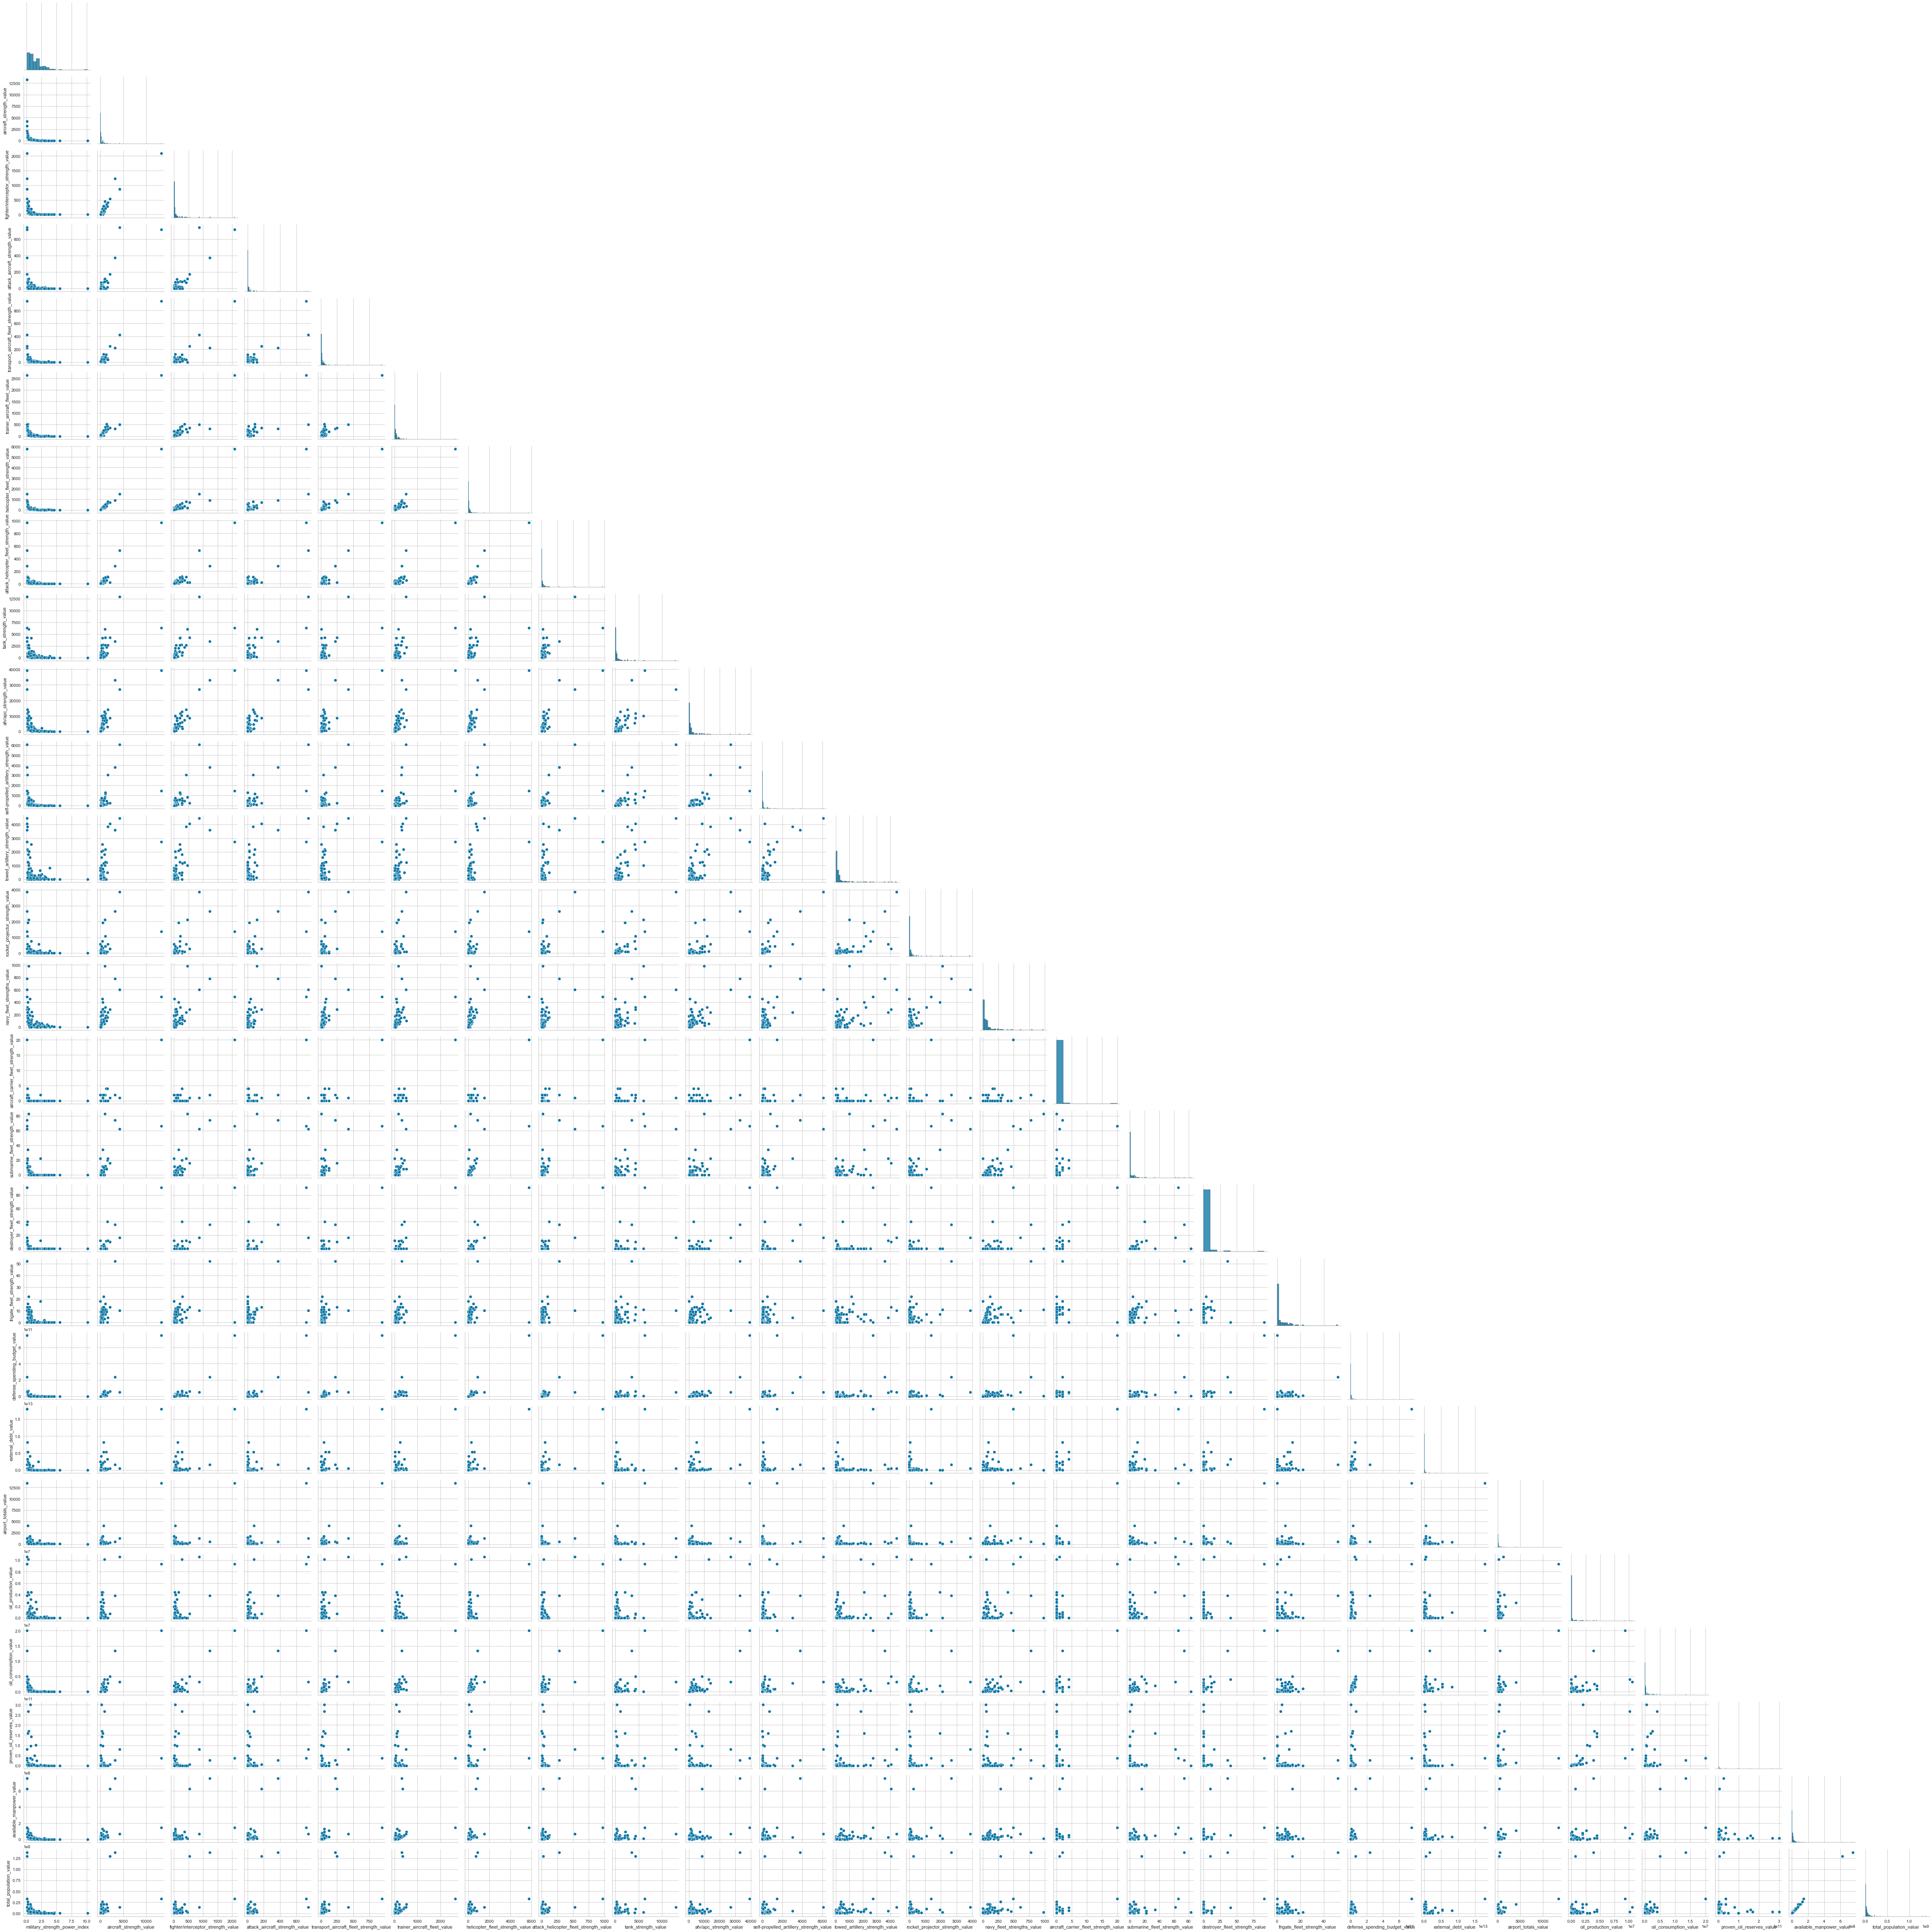

In [860]:
# sns.pairplot(df, palette="inferno", corner=True);

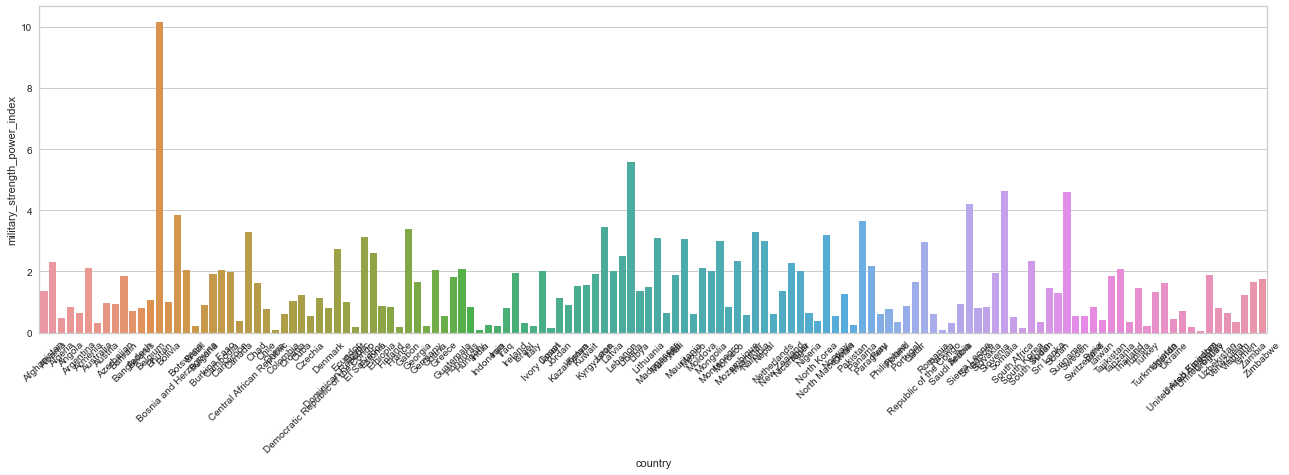

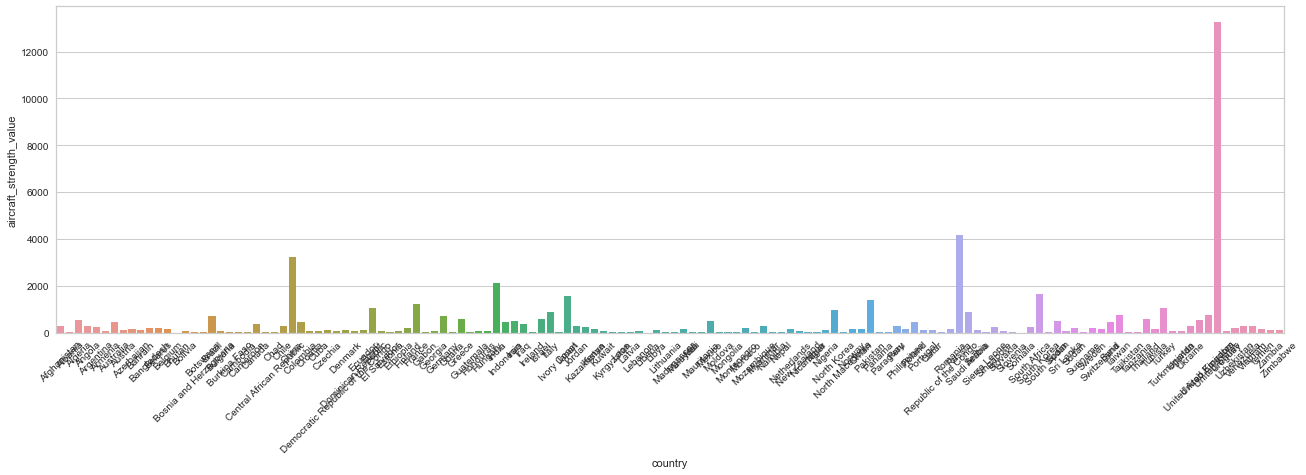

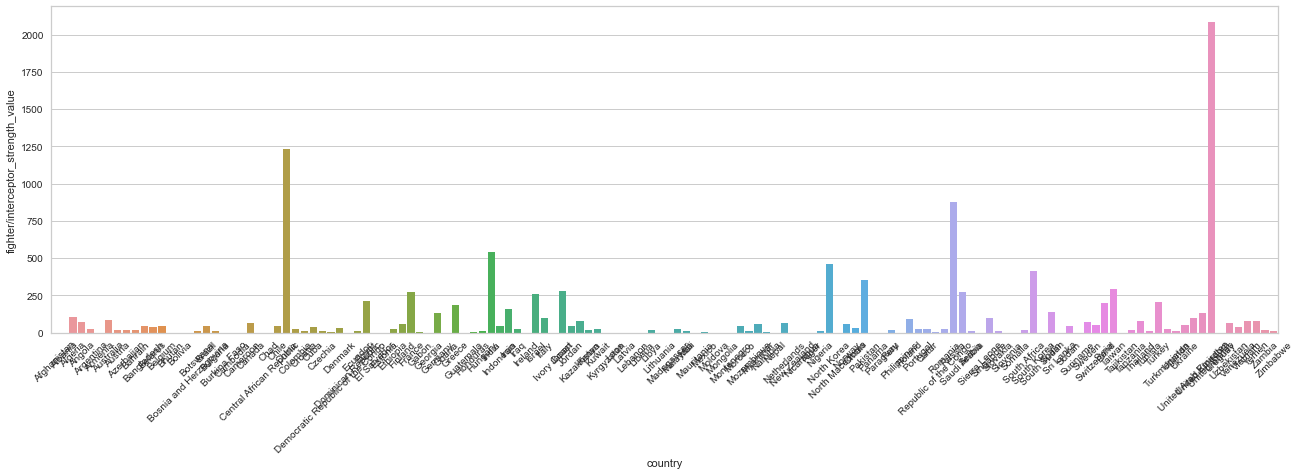

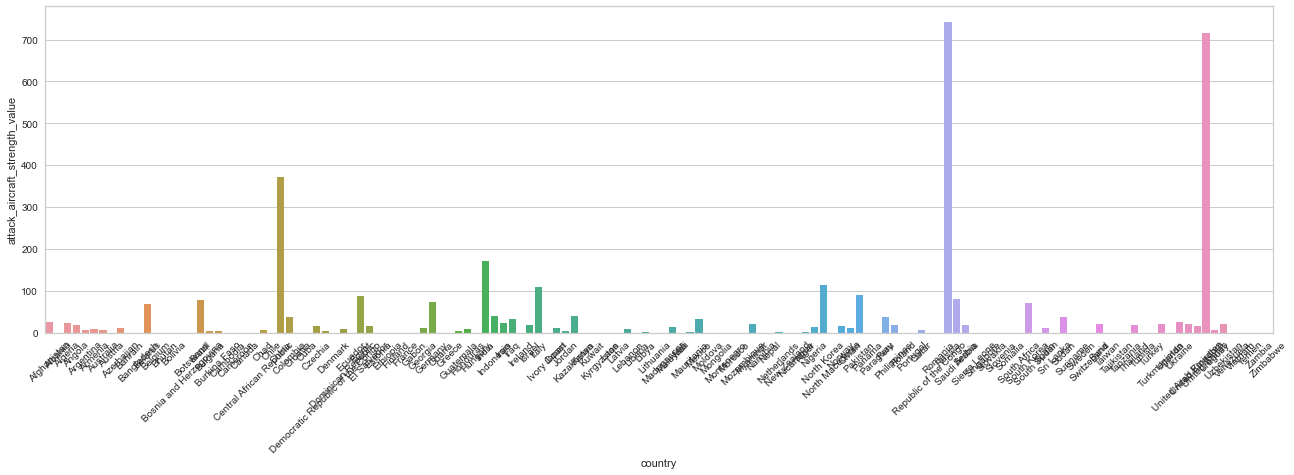

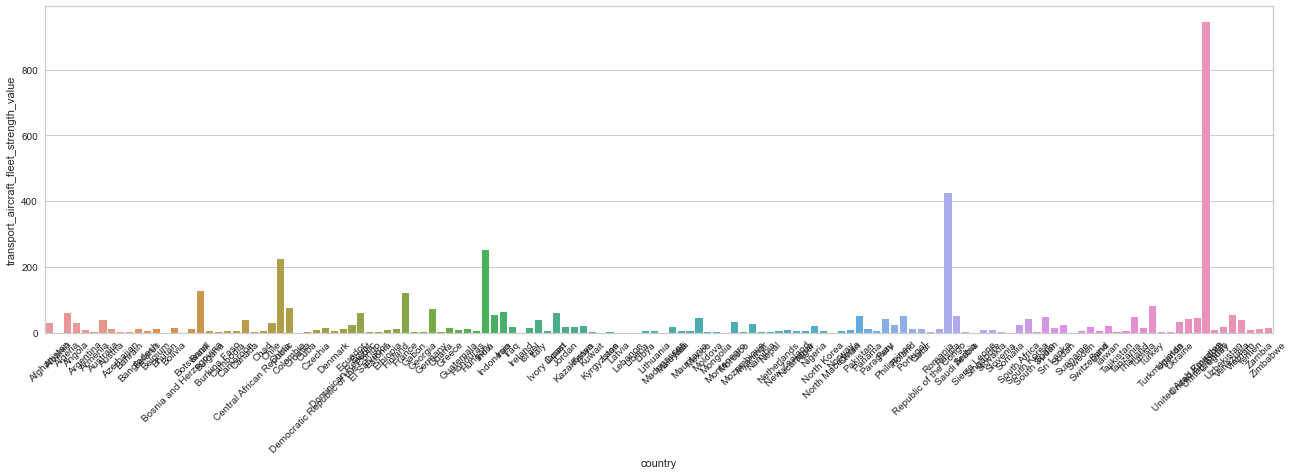

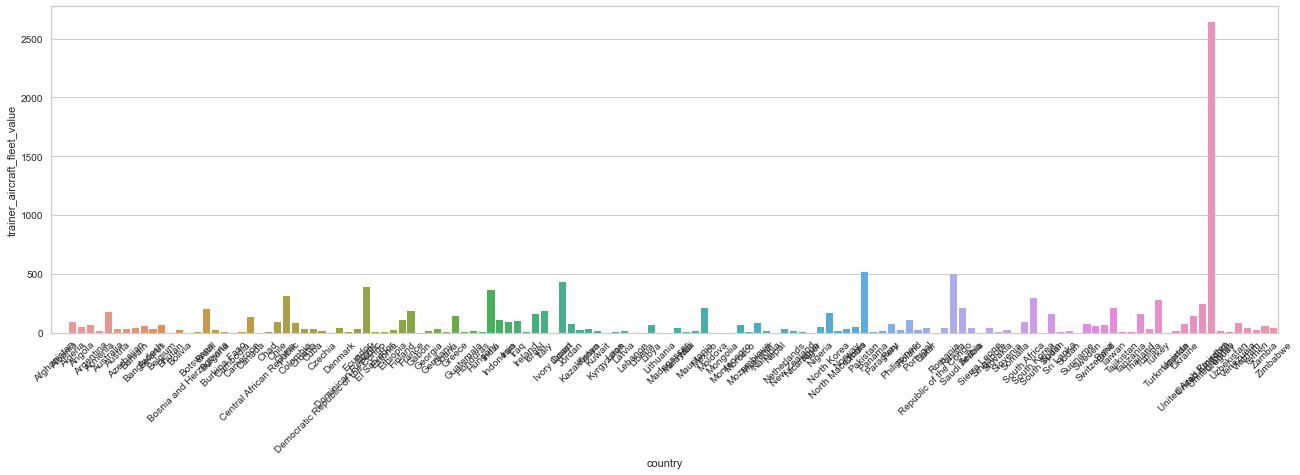

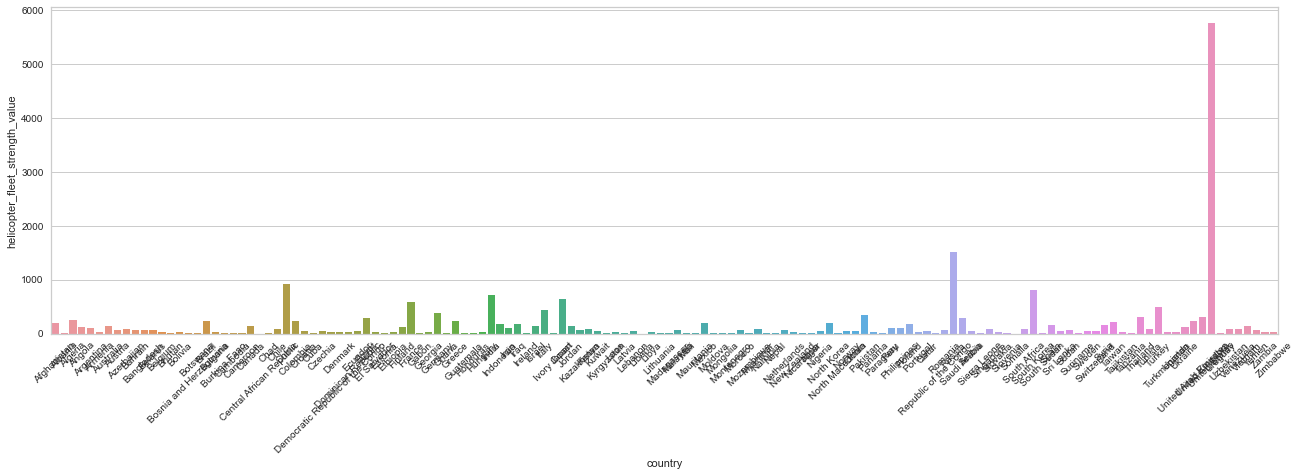

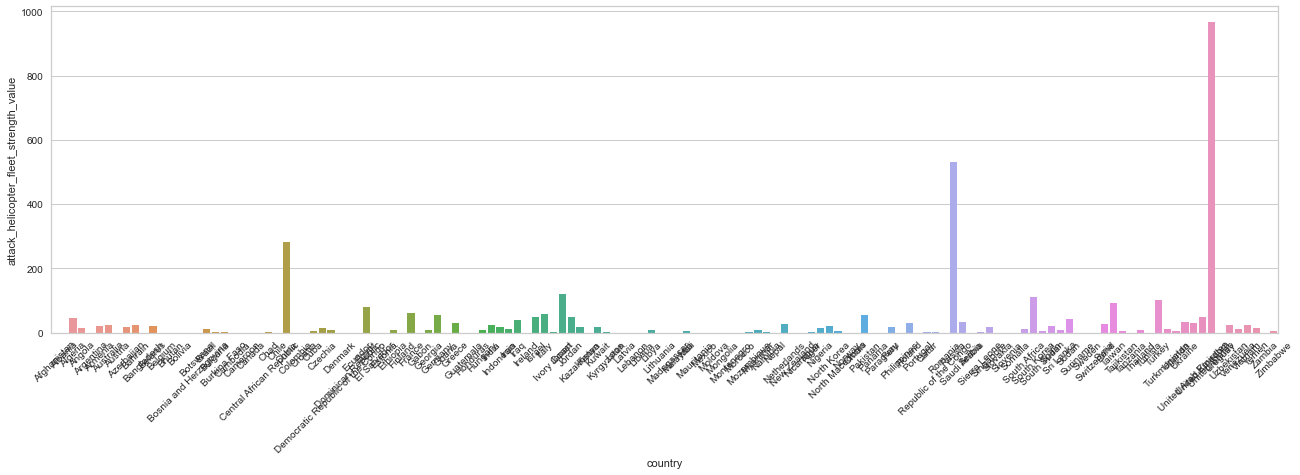

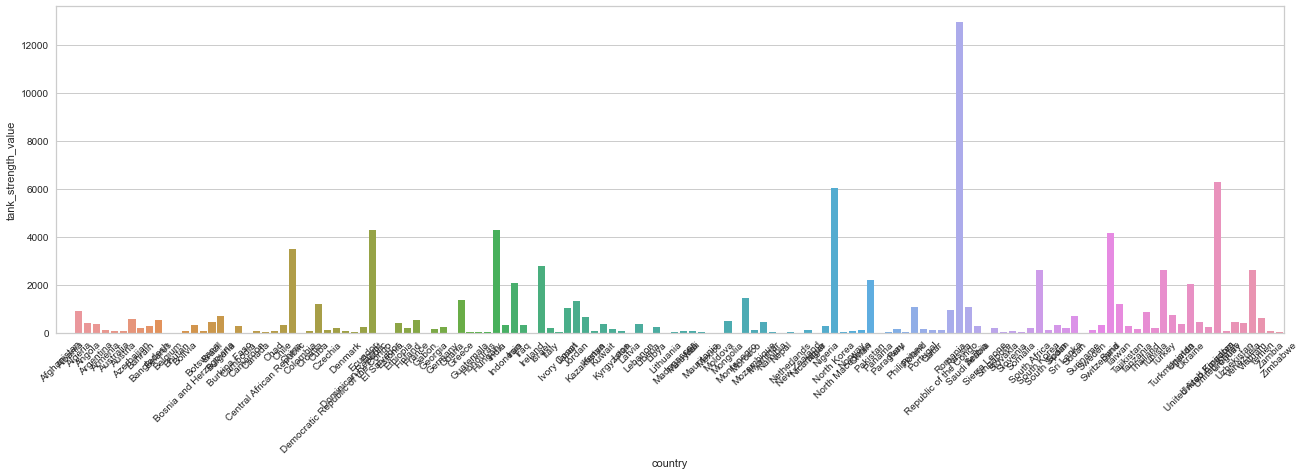

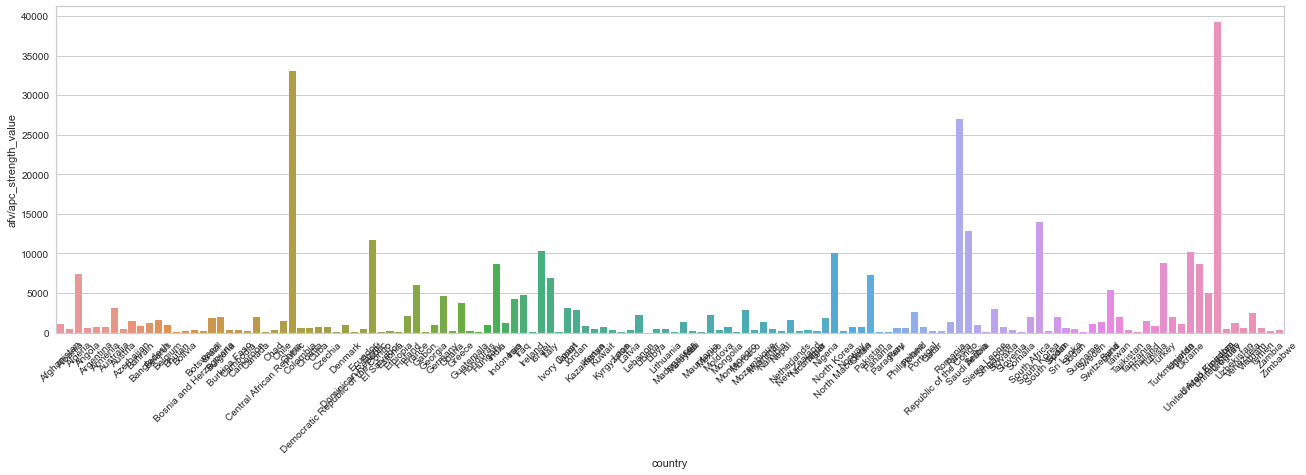

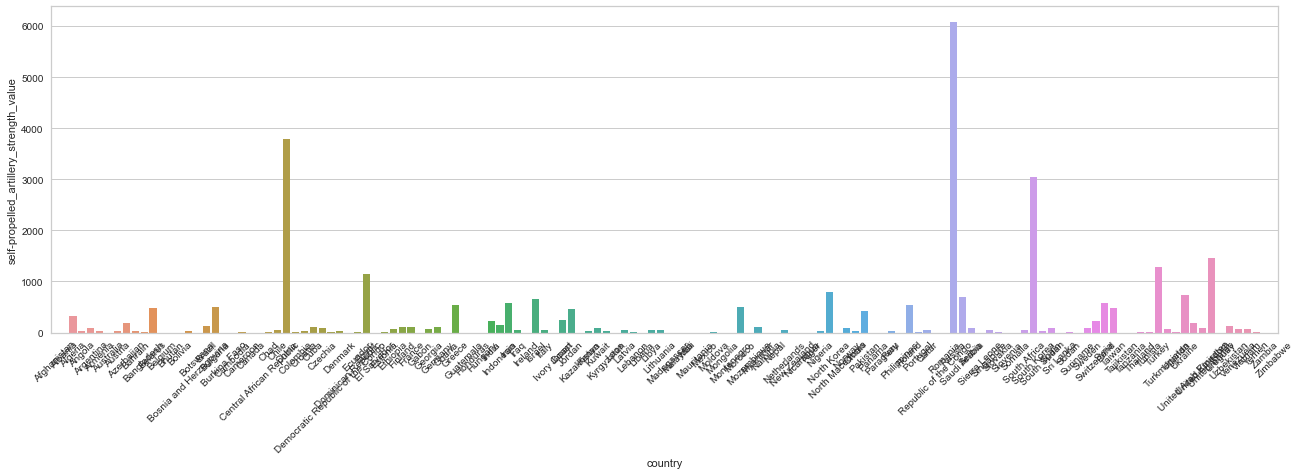

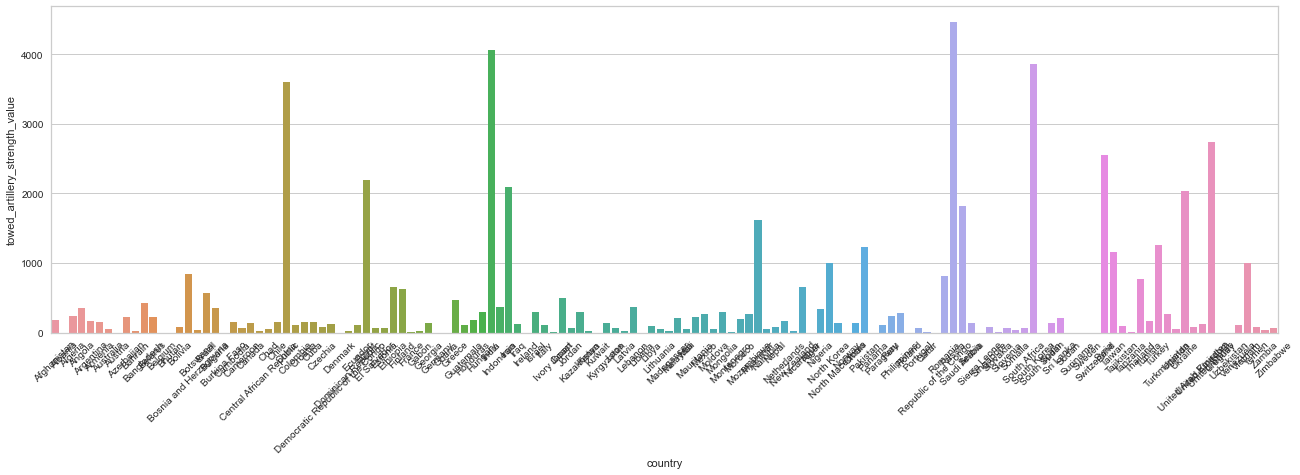

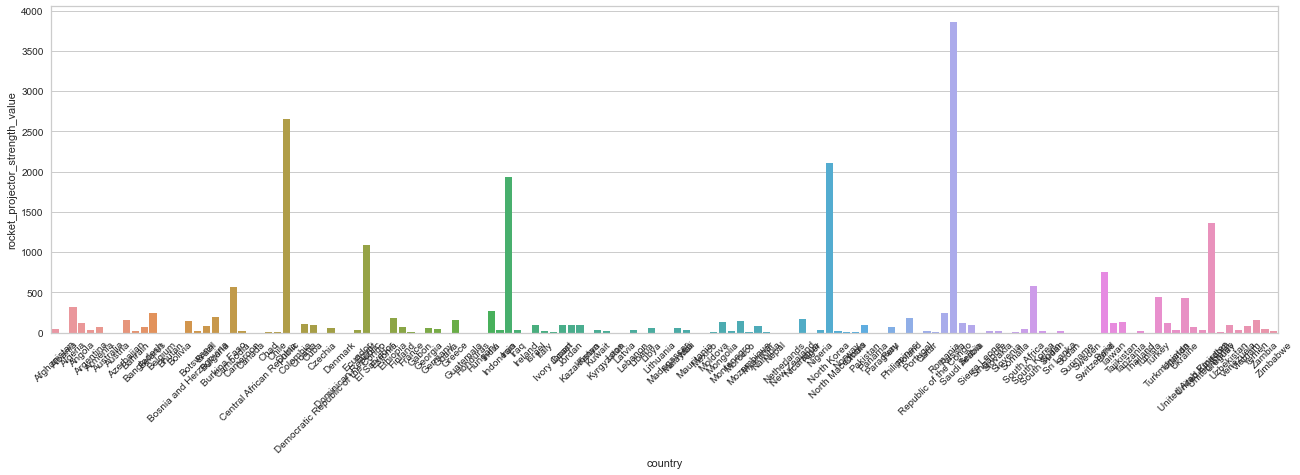

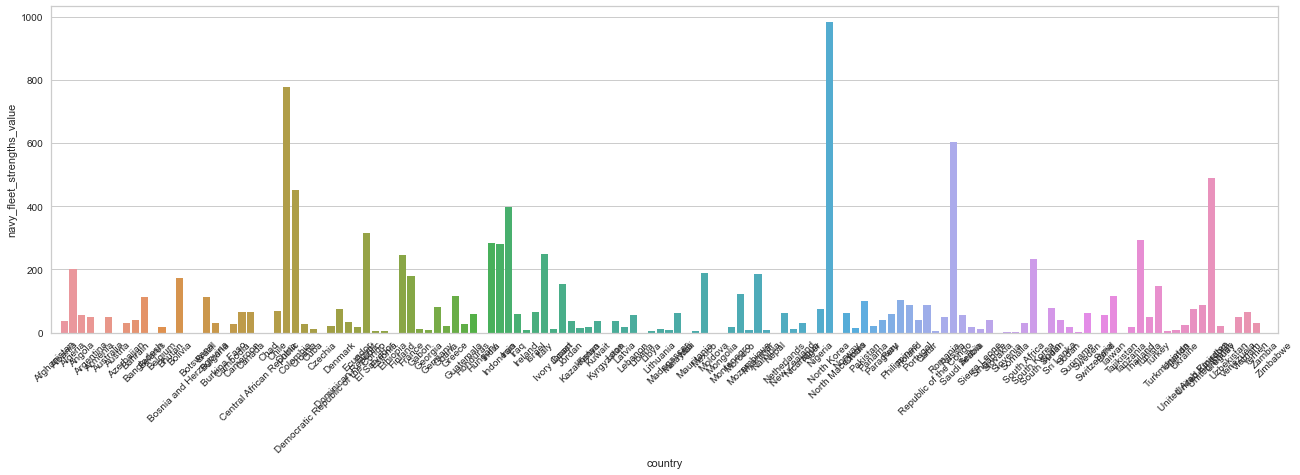

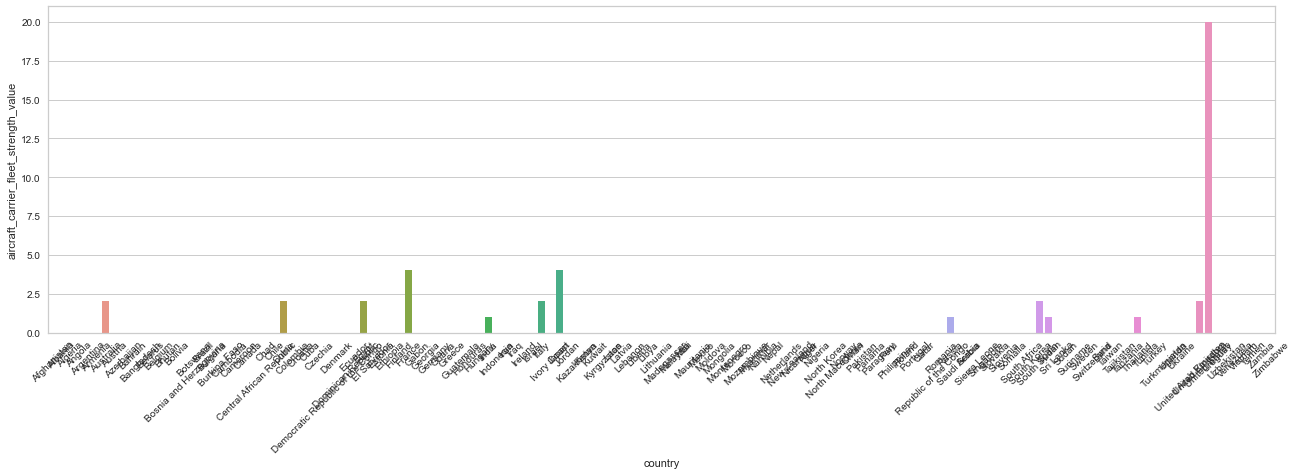

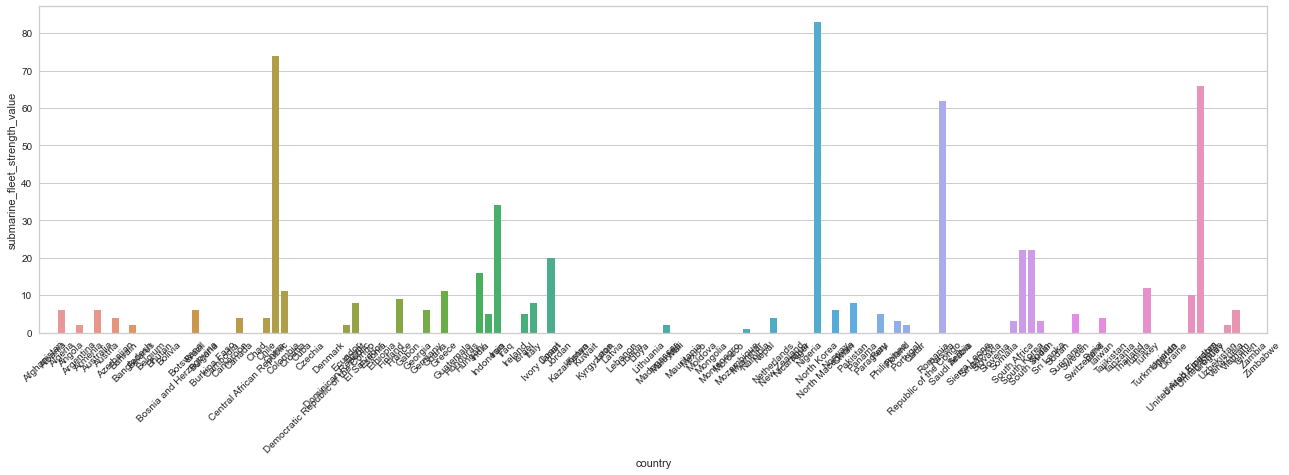

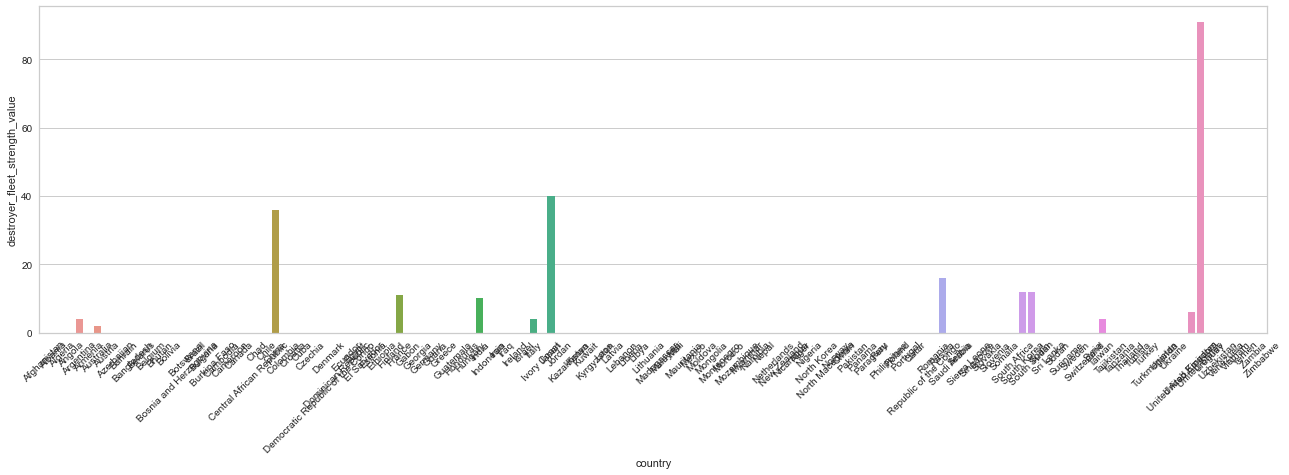

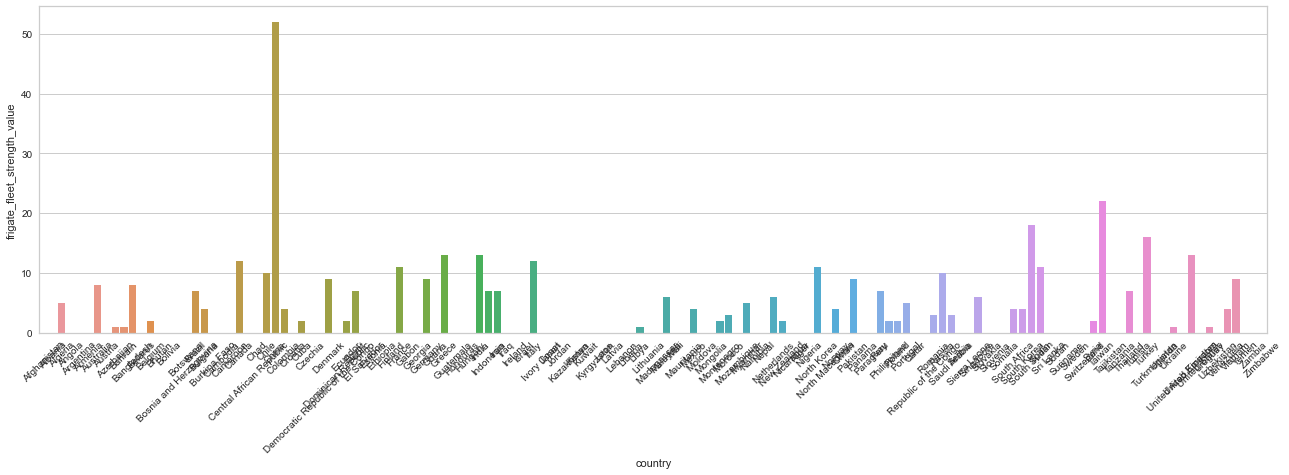

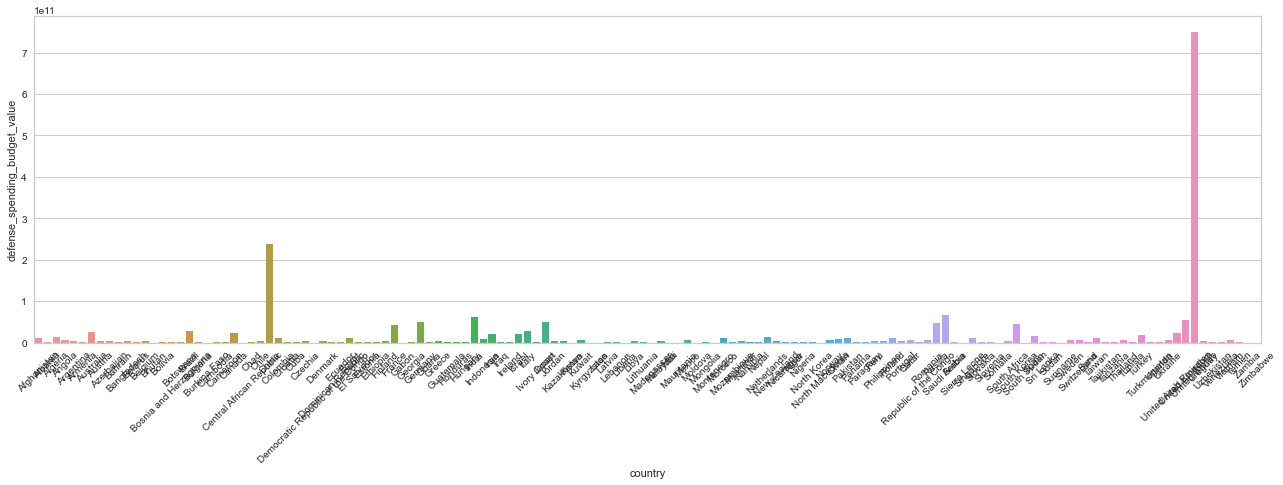

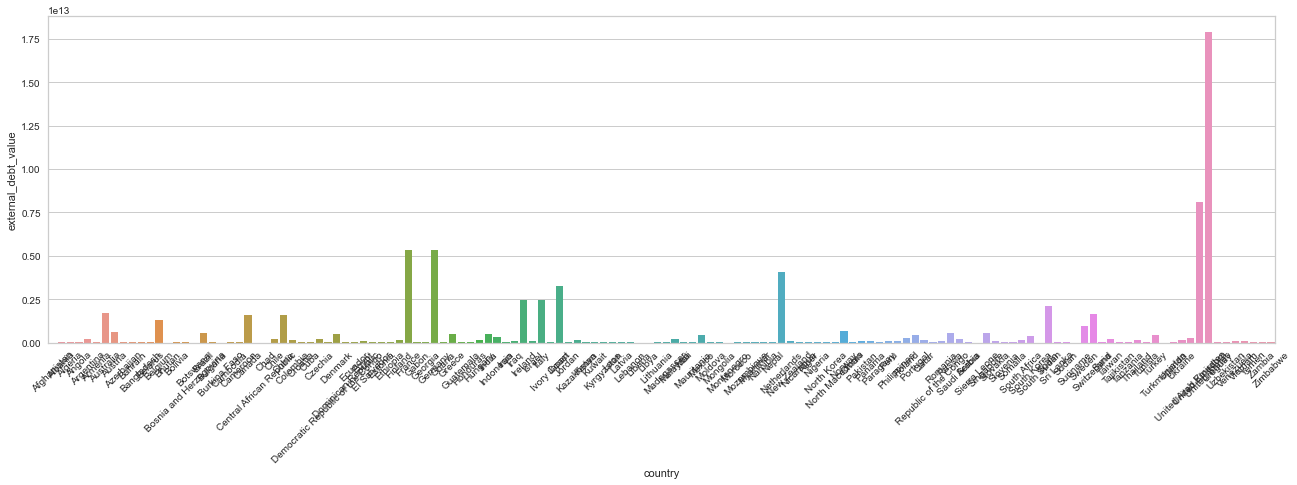

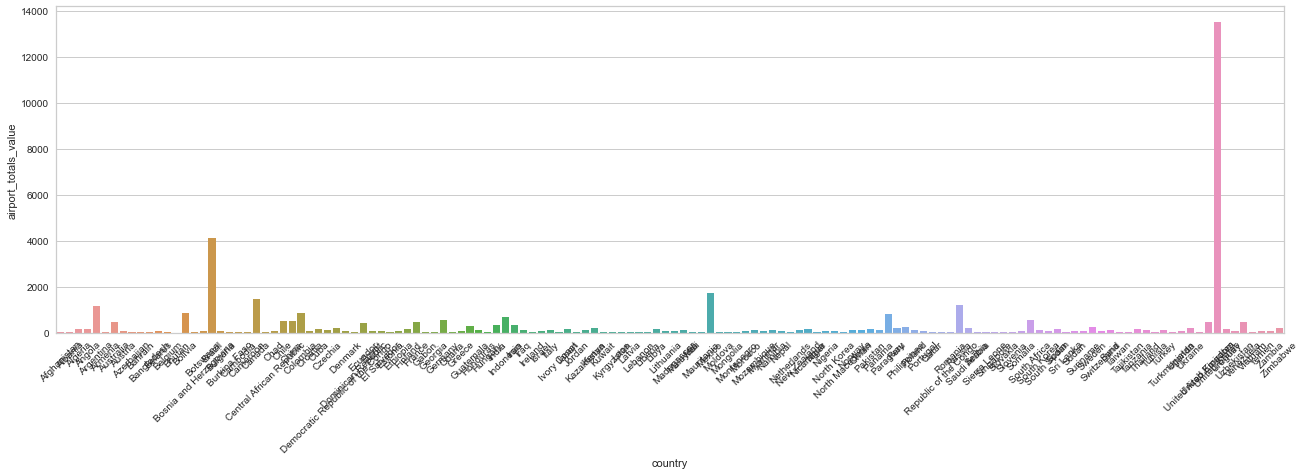

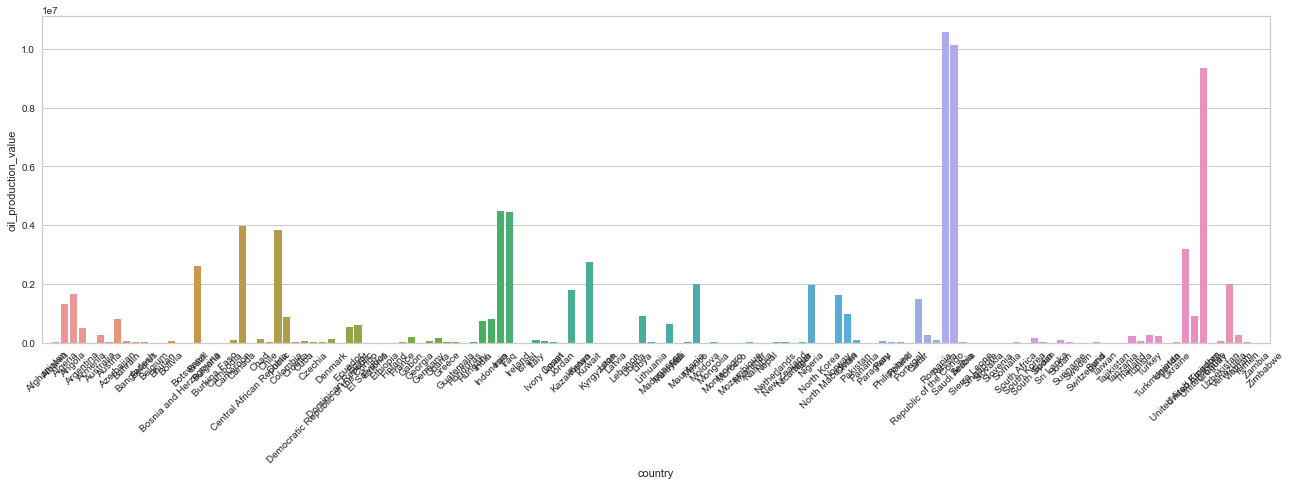

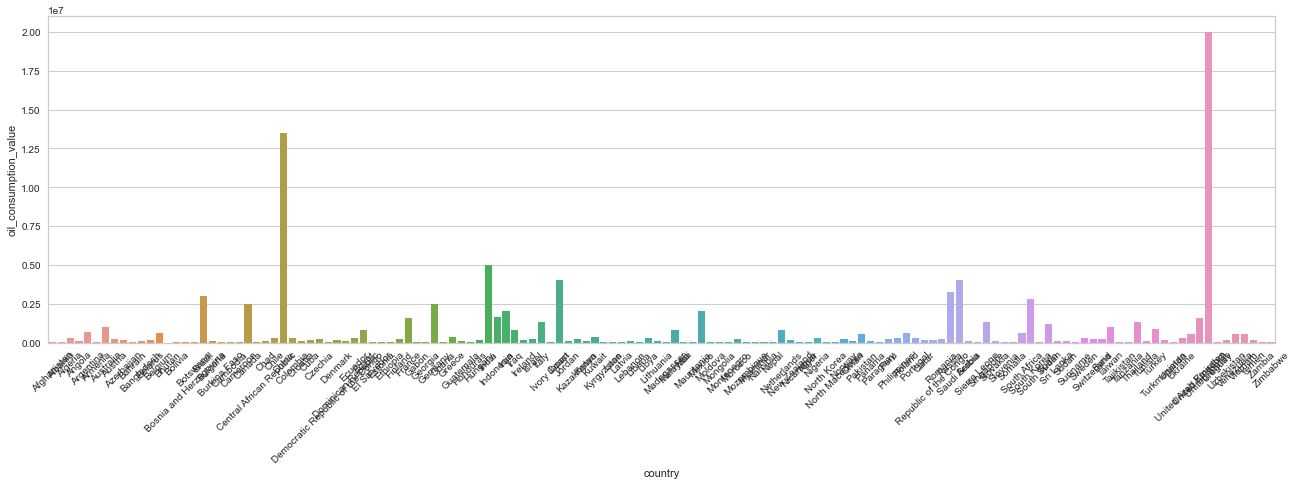

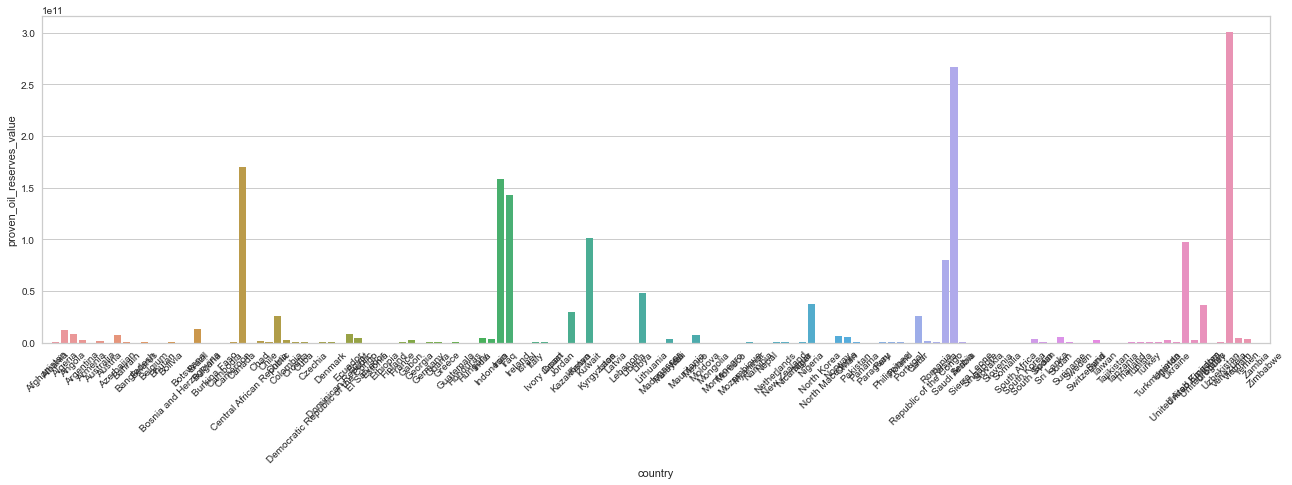

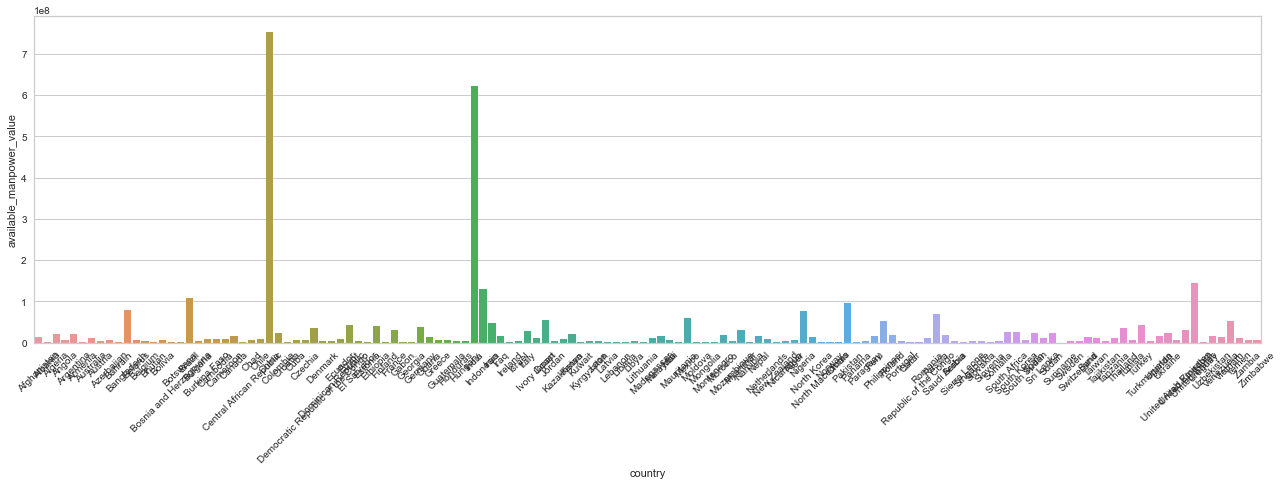

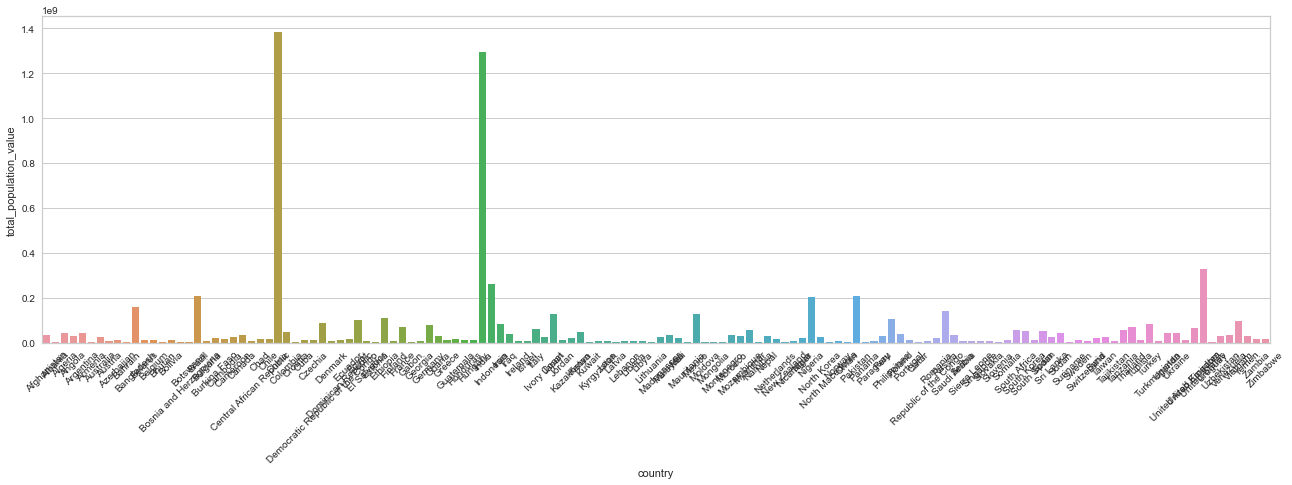

In [861]:
# for col in df.columns:
#     plt.figure(figsize = (22,6))
#     sns.barplot(y = df[col], x = df.index, data = df)
#     plt.xticks(rotation = 45);

## Descriptive statistics

In [862]:
df.describe().T

count             mean  \
military_strength_power_index           138.000            1.461   
aircraft_strength_value                 138.000          388.471   
fighter/interceptor_strength_value      138.000           81.565   
attack_aircraft_strength_value          138.000           25.761   
transport_aircraft_fleet_strength_value 138.000           30.232   
trainer_aircraft_fleet_value            138.000           82.833   
helicopter_fleet_strength_value         138.000          154.065   
attack_helicopter_fleet_strength_value  138.000           25.623   
tank_strength_value                     138.000          646.565   
afv/apc_strength_value                  138.000         2485.696   
self-propelled_artillery_strength_value 138.000          212.159   
towed_artillery_strength_value          138.000          393.978   
rocket_projector_strength_value         138.000          156.935   
navy_fleet_strengths_value              138.000           76.362   
aircraft_carrier_fleet_strength_value   138.000            0.319   
submarine_fleet_strength_value          138.000            4.159   
destroyer_fleet_strength_value          138.000            1.797   
frigate_fleet_strength_value            138.000            2.964   
defense_spending_budget_value           138.000  13993631641.210   
external_debt_value                     138.000 519498263043.478   
airport_totals_value                    138.000          290.043   
oil_production_value                    138.000       585552.355   
oil_consumption_value                   138.000       702018.696   
proven_oil_reserves_value               138.000  11944118420.290   
available_manpower_value                138.000     25442969.935   
total_population_value                  138.000     53180584.652   

                                                      std           min  \
military_strength_power_index                       1.324         0.061   
aircraft_strength_value                          1231.982         0.000   
fighter/interceptor_strength_value                230.325         0.000   
attack_aircraft_strength_value                     94.528         0.000   
transport_aircraft_fleet_strength_value            92.330         0.000   
trainer_aircraft_fleet_value                      240.804         0.000   
helicopter_fleet_strength_value                   520.184         0.000   
attack_helicopter_fleet_strength_value             97.326         0.000   
tank_strength_value                              1515.464         0.000   
afv/apc_strength_value                           5410.546         0.000   
self-propelled_artillery_strength_value           688.029         0.000   
towed_artillery_strength_value                    805.782         0.000   
rocket_projector_strength_value                   484.381         0.000   
navy_fleet_strengths_value                        140.822         0.000   
aircraft_carrier_fleet_strength_value               1.804         0.000   
submarine_fleet_strength_value                     12.719         0.000   
destroyer_fleet_strength_value                      9.195         0.000   
frigate_fleet_strength_value                        6.053         0.000   
defense_spending_budget_value             67311892724.125  13000000.000   
external_debt_value                     1847251527661.875 539400000.000   
airport_totals_value                             1212.967         2.000   
oil_production_value                          1667138.897         0.000   
oil_consumption_value                         2168810.056      2000.000   
proven_oil_reserves_value                 42750903273.129         0.000   
available_manpower_value                     84506975.276    132740.000   
total_population_value                      165108987.399    597927.000   

                                                   25%             50%  \
military_strength_power_index                    0.575           1.034   
aircraft_strength_value        

In [863]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

defense_spending_budget_value             9.959
airport_totals_value                      9.845
aircraft_carrier_fleet_strength_value     9.772
helicopter_fleet_strength_value           9.497
trainer_aircraft_fleet_value              9.035
aircraft_strength_value                   8.789
transport_aircraft_fleet_strength_value   7.951
attack_helicopter_fleet_strength_value    7.883
destroyer_fleet_strength_value            7.728
available_manpower_value                  7.377
total_population_value                    7.110
external_debt_value                       7.052
oil_consumption_value                     6.874
attack_aircraft_strength_value            6.489
self-propelled_artillery_strength_value   6.258
fighter/interceptor_strength_value        6.226
rocket_projector_strength_value           5.345
tank_strength_value                       5.082
proven_oil_reserves_value                 4.881
submarine_fleet_strength_value            4.675
afv/apc_strength_value                  

In [864]:
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

defense_spending_budget_value             9.959
airport_totals_value                      9.845
aircraft_carrier_fleet_strength_value     9.772
helicopter_fleet_strength_value           9.497
trainer_aircraft_fleet_value              9.035
aircraft_strength_value                   8.789
transport_aircraft_fleet_strength_value   7.951
attack_helicopter_fleet_strength_value    7.883
destroyer_fleet_strength_value            7.728
available_manpower_value                  7.377
total_population_value                    7.110
external_debt_value                       7.052
oil_consumption_value                     6.874
attack_aircraft_strength_value            6.489
self-propelled_artillery_strength_value   6.258
fighter/interceptor_strength_value        6.226
rocket_projector_strength_value           5.345
tank_strength_value                       5.082
proven_oil_reserves_value                 4.881
submarine_fleet_strength_value            4.675
afv/apc_strength_value                  

In [865]:
#Interpreting Skewness 

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   2.6706592171090633  means that the distribution is approx.   highly skewed 
A skewness value of   8.789333213231357  means that the distribution is approx.   highly skewed 
A skewness value of   6.225776745899961  means that the distribution is approx.   highly skewed 
A skewness value of   6.489261954280916  means that the distribution is approx.   highly skewed 
A skewness value of   7.95096255063359  means that the distribution is approx.   highly skewed 
A skewness value of   9.035121167203796  means that the distribution is approx.   highly skewed 
A skewness value of   9.496532868859475  means that the distribution is approx.   highly skewed 
A skewness value of   7.882557750772219  means that the distribution is approx.   highly skewed 
A skewness value of   5.081714659457636  means that the distribution is approx.   highly skewed 
A skewness value of   4.582304838220883  means that the distribution is approx.   highly skewed 
A skewness value of   6.257622

In [866]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

defense_spending_budget_value             106.869
airport_totals_value                      105.399
aircraft_carrier_fleet_strength_value     105.211
helicopter_fleet_strength_value           100.829
trainer_aircraft_fleet_value               94.603
aircraft_strength_value                    88.850
transport_aircraft_fleet_strength_value    73.350
attack_helicopter_fleet_strength_value     69.606
destroyer_fleet_strength_value             68.279
external_debt_value                        59.907
available_manpower_value                   57.864
oil_consumption_value                      54.228
total_population_value                     53.839
fighter/interceptor_strength_value         46.648
self-propelled_artillery_strength_value    45.347
attack_aircraft_strength_value             45.044
tank_strength_value                        33.708
rocket_projector_strength_value            32.166
frigate_fleet_strength_value               31.422
proven_oil_reserves_value                  25.894


In [867]:
#Calculating Kurtosis 

kurtosis_limit = 7 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

defense_spending_budget_value             106.869
airport_totals_value                      105.399
aircraft_carrier_fleet_strength_value     105.211
helicopter_fleet_strength_value           100.829
trainer_aircraft_fleet_value               94.603
aircraft_strength_value                    88.850
transport_aircraft_fleet_strength_value    73.350
attack_helicopter_fleet_strength_value     69.606
destroyer_fleet_strength_value             68.279
external_debt_value                        59.907
available_manpower_value                   57.864
oil_consumption_value                      54.228
total_population_value                     53.839
fighter/interceptor_strength_value         46.648
self-propelled_artillery_strength_value    45.347
attack_aircraft_strength_value             45.044
tank_strength_value                        33.708
rocket_projector_strength_value            32.166
frigate_fleet_strength_value               31.422
proven_oil_reserves_value                  25.894


# Data Preprocessing

In [868]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale

In [869]:
df1 = df.copy()

In [870]:
df1.reset_index(inplace=True)

In [871]:
df1.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   

   available_manpower_value  total_population_value  
0              14325743.000            34940837.000

In [872]:
X = df1.drop(["country"], axis = 1)

In [873]:
scaler = scale

In [874]:
X_scaled = pd.DataFrame(scaler(X))

In [875]:
X_scaled.head(1)

0      1      2      3      4      5     6      7      8      9      10  \
0 -0.088 -0.105 -0.355 -0.008 -0.003 -0.345 0.064 -0.264 -0.428 -0.264 -0.309   

      11     12     13     14     15     16     17     18     19     20  \
0 -0.272 -0.222 -0.544 -0.177 -0.328 -0.196 -0.491 -0.030 -0.281 -0.204   

      21     22     23     24     25  
0 -0.353 -0.322 -0.280 -0.132 -0.111

In [876]:
X_scaled.shape

(138, 26)

# Modelling

In [877]:
K_means_model = KMeans(random_state = 101)

In [878]:
K_means_model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 6, 0, 0, 0, 6, 6, 0, 0, 7, 0, 7, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0,
       6, 0, 7, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

In [485]:
# K_means_model.fit(X)

In [486]:
# K_means_model.labels_

In [487]:
# X["clusters"] = K_means_model.labels_

In [488]:
# X

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [879]:
from pyclustertend import hopkins

In [880]:
hopkins(df, df.shape[0])

0.07298950042915751

In [881]:
df11 = df.copy()
df12 = df.copy()
df13 = df.copy()

In [882]:
hopkins(scale(df11), df11.shape[0])

0.07620225329200718

In [883]:
hopkins(MinMaxScaler().fit_transform(df12), df12.shape[0])

0.08320972190425162

In [884]:
hopkins(StandardScaler().fit_transform(df13), df13.shape[0])

0.07563050047127738

In [885]:
hopkins(scale(df), df.shape[0])

0.07560828022200929

## Clustering with K-means

### Elbow Method 
We use this method to find optimal k value by looking up to break point of graph. 

In [886]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

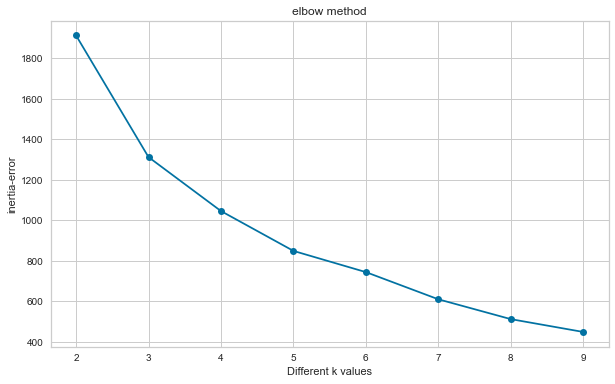

In [887]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [888]:
ssd # sum of squared distance

[1913.4825726106826,
 1312.3964106007531,
 1045.8678492319914,
 849.001749180456,
 744.2002246322529,
 609.8487829843649,
 511.87139844261316,
 448.4956396877131]

In [889]:
pd.Series(ssd).diff()

0        NaN
1   -601.086
2   -266.529
3   -196.866
4   -104.802
5   -134.351
6    -97.977
7    -63.376
dtype: float64

In [890]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

0
1     NaN
2 601.086
3 266.529
4 196.866
5 104.802
6 134.351
7  97.977
8  63.376

<AxesSubplot:>

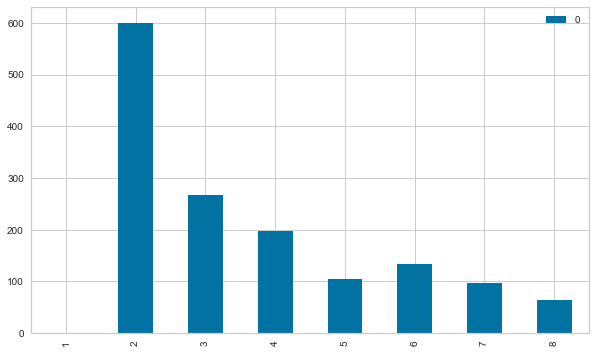

In [891]:
df1_diff.plot(kind='bar')

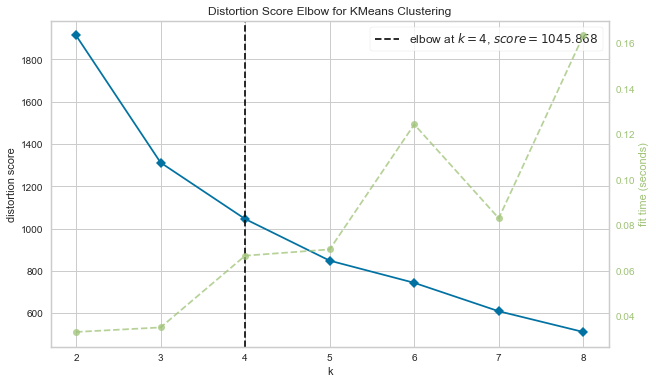

In [892]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

### Silhouette analysis

In [893]:
from sklearn.metrics import silhouette_score

In [894]:
silhouette_score(X_scaled, K_means_model.labels_)

0.11677148761192666

In [895]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8633678242036664
For n_clusters=3, the silhouette score is 0.8002153355737942
For n_clusters=4, the silhouette score is 0.5173329316453612
For n_clusters=5, the silhouette score is 0.47397893538005575
For n_clusters=6, the silhouette score is 0.49172152107034267
For n_clusters=7, the silhouette score is 0.4761723268387499
For n_clusters=8, the silhouette score is 0.4663736308553614


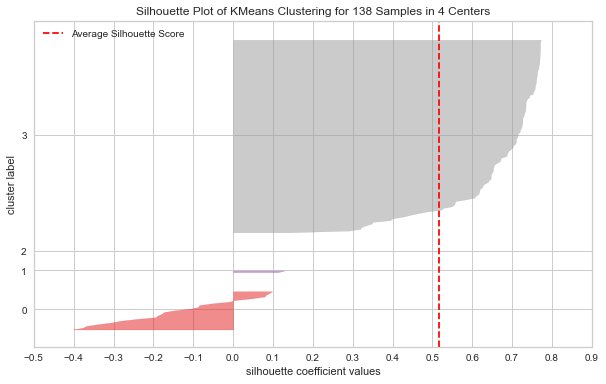

In [896]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

### Model Building and label visualisation

In [897]:
model = KMeans(n_clusters = 4, random_state = 101)
model.fit_predict(X_scaled)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [898]:
model.labels_

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [899]:
X["clusters"] = model.fit_predict(X_scaled)

In [900]:
X.head()

military_strength_power_index  aircraft_strength_value  \
0                          1.344                      260   
1                          2.314                       19   
2                          0.466                      551   
3                          0.838                      295   
4                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1                  250000000.000       9505000000.000                     4   
2      

In [901]:
X.clusters.value_counts()

3    112
0     23
1      2
2      1
Name: clusters, dtype: int64

In [902]:
df1.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   

   available_manpower_value  total_population_value  
0              14325743.000            34940837.000

In [903]:
df1["predicted_clusters"] = model.fit_predict(X_scaled)

In [904]:
df1[df1["predicted_clusters"]==0]["country"]

2             Algeria
17             Brazil
22             Canada
35              Egypt
40             France
43            Germany
45             Greece
49              India
50          Indonesia
51               Iran
55              Italy
57              Japan
87        North Korea
91           Pakistan
102      Saudi Arabia
110       South Korea
118             Syria
119            Taiwan
122          Thailand
124            Turkey
127           Ukraine
129    United Kingdom
134           Vietnam
Name: country, dtype: object

In [905]:
df1[df1["predicted_clusters"]==1]["country"]

26      China
101    Russia
Name: country, dtype: object

In [906]:
df1[df1["predicted_clusters"]==2]["country"]

130    United States
Name: country, dtype: object

In [907]:
df1[df1["predicted_clusters"]==3]["country"]

0      Afghanistan
1          Albania
3           Angola
4        Argentina
5          Armenia
          ...     
132     Uzbekistan
133      Venezuela
135          Yemen
136         Zambia
137       Zimbabwe
Name: country, Length: 112, dtype: object

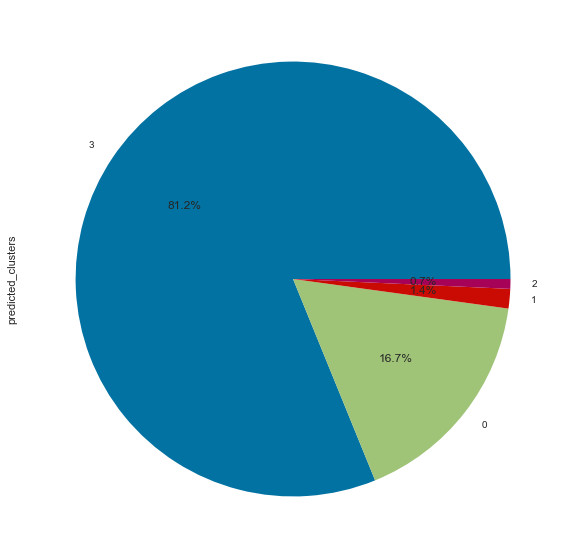

In [908]:
df1["predicted_clusters"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

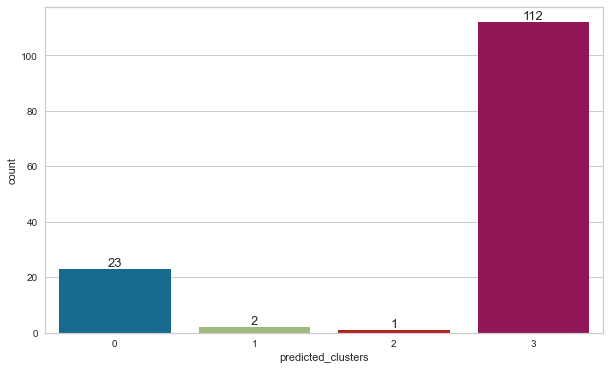

In [909]:
df1.predicted_clusters.value_counts()

sns.countplot(x=df1["predicted_clusters"], data=df1)
for index,value in enumerate(df1.predicted_clusters.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [910]:
df1[df1["predicted_clusters"]==0][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
49            India                          0.095
57            Japan                          0.150
110     South Korea                          0.151
40           France                          0.170
129  United Kingdom                          0.172
35            Egypt                          0.187
17           Brazil                          0.199
124          Turkey                          0.210
55            Italy                          0.211
43          Germany                          0.219
51             Iran                          0.219
91         Pakistan                          0.236
50        Indonesia                          0.254
102    Saudi Arabia                          0.303
134         Vietnam                          0.356
122        Thailand                          0.357
22           Canada                          0.371
87      North Korea                          0.372
119          Taiwan                          0.401
127         Ukraine                          0.446
2           Algeria                          0.466
45           Greece                          0.531
118           Syria                          0.824

In [911]:
df1[df1["predicted_clusters"]==1][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
101  Russia                          0.068
26    China                          0.069

In [912]:
df1[df1["predicted_clusters"]==2][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
130  United States                          0.061

In [913]:
df1[df1["predicted_clusters"]==3][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
54         Israel                          0.311
6       Australia                          0.323
112         Spain                          0.339
96         Poland                          0.340
109  South Africa                          0.498
..            ...                            ...
104  Sierra Leone                          4.206
115      Suriname                          4.604
108       Somalia                          4.640
66        Liberia                          5.574
13         Bhutan                         10.168

[112 rows x 2 columns]

### Evaluate 

In [974]:
df1.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   

   available_manpower_value  total_population_value  predicted_clusters  \
0              14325743.000            34940837.000                   3   

   classification  
0               3

In [975]:
df1['military_strength_power_index'].describe()

count   138.000
mean      1.461
std       1.324
min       0.061
25%       0.575
50%       1.034
75%       2.022
max      10.168
Name: military_strength_power_index, dtype: float64

In [976]:
df1['military_strength_power_index'].value_counts().index.sort_values()

Float64Index([ 0.0606,  0.0681,  0.0691,  0.0953,  0.1501,  0.1509,  0.1702,
               0.1717,  0.1872,  0.1988,
              ...
               3.2889,  3.3736,  3.4433,  3.6537,  3.8586,  4.2063,  4.6042,
               4.6404,  5.5737, 10.1681],
             dtype='float64', length=138)

In [977]:
df1['military_strength_power_index'].iplot(kind='hist', bins=200)

In [978]:
def classification(military_strength_power_index):
    if military_strength_power_index <= 0.065:
        return 2
    elif 0.065 < military_strength_power_index <= 0.1:
        return 1
    elif 0.1 < military_strength_power_index <= 0.5:
        return 0
    else:
        return 3

In [979]:
df1['classification'] = df1['military_strength_power_index'].apply(classification)

In [980]:
df1.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   

   available_manpower_value  total_population_value  predicted_clusters  \
0              14325743.000            34940837.000                   3   

   classification  
0               3

In [981]:
df1['classification'].value_counts()

3    109
0     25
1      3
2      1
Name: classification, dtype: int64

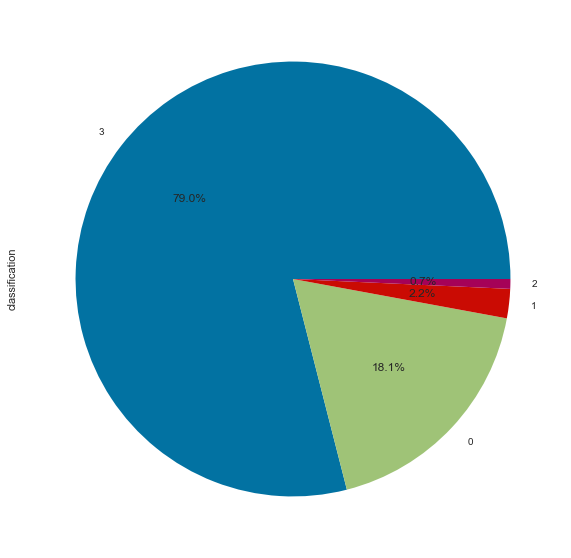

In [982]:
df1["classification"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

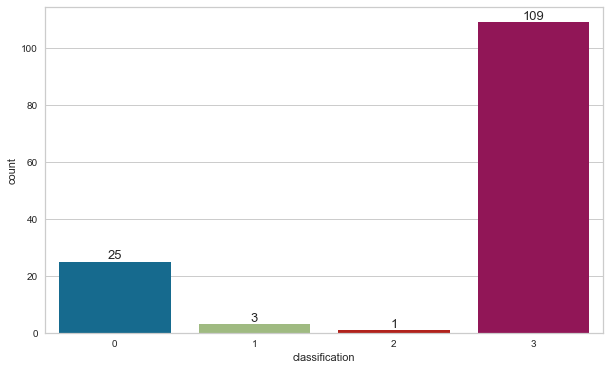

In [983]:
df1.classification.value_counts()

sns.countplot(x=df1["classification"], data=df1)
for index,value in enumerate(df1.classification.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [984]:
df1[df1["classification"]==2][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
130  United States                          0.061

In [985]:
len(df1[df1["classification"]==2]["country"])

1

In [986]:
df1[df1["classification"]==1][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
101  Russia                          0.068
26    China                          0.069
49    India                          0.095

In [987]:
len(df1[df1["classification"]==1]["country"])

3

In [988]:
df1[df1["classification"]==0][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
57            Japan                          0.150
110     South Korea                          0.151
40           France                          0.170
129  United Kingdom                          0.172
35            Egypt                          0.187
17           Brazil                          0.199
124          Turkey                          0.210
55            Italy                          0.211
43          Germany                          0.219
51             Iran                          0.219
91         Pakistan                          0.236
50        Indonesia                          0.254
102    Saudi Arabia                          0.303
54           Israel                          0.311
6         Australia                          0.323
112           Spain                          0.339
96           Poland                          0.340
134         Vietnam                          0.356
122        Thailand                          0.357
22           Canada                          0.371
87      North Korea                          0.372
119          Taiwan                          0.401
127         Ukraine                          0.446
2           Algeria                          0.466
109    South Africa                          0.498

In [989]:
len(df1[df1["classification"]==0]["country"])

25

In [990]:
df1[df1["classification"]==3][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
117   Switzerland                          0.526
89         Norway                          0.528
116        Sweden                          0.530
45         Greece                          0.531
30        Czechia                          0.553
..            ...                            ...
104  Sierra Leone                          4.206
115      Suriname                          4.604
108       Somalia                          4.640
66        Liberia                          5.574
13         Bhutan                         10.168

[109 rows x 2 columns]

In [991]:
len(df1[df1["classification"]==3]["country"])

109

In [992]:
from sklearn.metrics import adjusted_rand_score

In [993]:
df1_end = df1
df1_end

country  military_strength_power_index  aircraft_strength_value  \
0    Afghanistan                          1.344                      260   
1        Albania                          2.314                       19   
2        Algeria                          0.466                      551   
3         Angola                          0.838                      295   
4      Argentina                          0.652                      227   
..           ...                            ...                      ...   
133    Venezuela                          0.645                      260   
134      Vietnam                          0.356                      293   
135        Yemen                          1.241                      169   
136       Zambia                          1.646                      108   
137     Zimbabwe                          1.758                       90   

     fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                     0                              25   
1                                     0                               0   
2                                   103                              22   
3                                    72                              18   
4                                    24                               7   
..                                  ...                             ...   
133                                  38                               0   
134                                  77                               0   
135                                  77                               0   
136                                  18                               0   
137                                  10                               0   

     transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                         30                             0   
1                                          0                             0   
2                                         59                            87   
3                                         30                            47   
4                                          9                            64   
..                                       ...                           ...   
133                                       52                            82   
134                                       38                            36   
135                                        8                            21   
136                                       11                            52   
137                                       14                            38   

     helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                                187                                       0   
1                                 19                                       0   
2                                257                                      45   
3                                126                                      15   
4                                100                                       0   
..                               ...                                     ...   
133                               86                                      10   
134                              138                                      25   
135                               61                                      14   
136                               27                                       0   
137                               28                                       6   

     tank_strength_value  afv/apc_strength_value  \
0                      0                    1062   
1                      0                     467   
2                    880                    7361   
3                    379                     595   
4                    370             

In [994]:
df1.predicted_clusters.value_counts()

3    112
0     23
1      2
2      1
Name: predicted_clusters, dtype: int64

In [995]:
df1.classification.value_counts()

3    109
0     25
1      3
2      1
Name: classification, dtype: int64

In [996]:
df1[["classification", "predicted_clusters"]].value_counts()

classification  predicted_clusters
3               3                     107
0               0                      20
                3                       5
1               1                       2
3               0                       2
1               0                       1
2               2                       1
dtype: int64

In [997]:
df1[["country", "classification", "predicted_clusters"]]

country  classification  predicted_clusters
0    Afghanistan               3                   3
1        Albania               3                   3
2        Algeria               0                   0
3         Angola               3                   3
4      Argentina               3                   3
..           ...             ...                 ...
133    Venezuela               3                   3
134      Vietnam               0                   0
135        Yemen               3                   3
136       Zambia               3                   3
137     Zimbabwe               3                   3

[138 rows x 3 columns]

In [998]:
df1[df1["classification"]!=df1["predicted_clusters"]][["country", "classification", "predicted_clusters"]]

country  classification  predicted_clusters
6       Australia               0                   3
45         Greece               3                   0
49          India               1                   0
54         Israel               0                   3
96         Poland               0                   3
109  South Africa               0                   3
112         Spain               0                   3
118         Syria               3                   0

## Hierarchical Clustering

In [999]:
df2 = df.copy()

In [1000]:
df2.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                         0.000                12000000000.000   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan       2840000000.000                    43                 0.000   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan               5500.000                      0.000   

             available_manpower_value  total_population_value  
country                                                        
Afghanistan              14325743.000            34940837.000

In [1001]:
X_scaled = scale(df2)

In [1002]:
pd.DataFrame(X_scaled)

0      1      2      3      4      5      6      7      8      9   \
0   -0.088 -0.105 -0.355 -0.008 -0.003 -0.345  0.064 -0.264 -0.428 -0.264   
1    0.647 -0.301 -0.355 -0.274 -0.329 -0.345 -0.261 -0.264 -0.428 -0.374   
2   -0.754  0.132  0.093 -0.040  0.313  0.017  0.199  0.200  0.155  0.904   
3   -0.472 -0.076 -0.042 -0.082 -0.003 -0.149 -0.054 -0.110 -0.177 -0.351   
4   -0.613 -0.132 -0.251 -0.199 -0.231 -0.078 -0.104 -0.264 -0.183 -0.324   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
133 -0.618 -0.105 -0.190 -0.274  0.237 -0.003 -0.131 -0.161 -0.170 -0.350   
134 -0.837 -0.078 -0.020 -0.274  0.084 -0.195 -0.031 -0.006  1.304  0.008   
135 -0.166 -0.179 -0.020 -0.274 -0.242 -0.258 -0.180 -0.120 -0.018 -0.347   
136  0.141 -0.228 -0.277 -0.274 -0.209 -0.129 -0.245 -0.264 -0.379 -0.427   
137  0.225 -0.243 -0.312 -0.274 -0.176 -0.187 -0.243 -0.202 -0.400 -0.405   

        10     11     12     13     14     15     16     17     18     19  \
0   -0.309 -0.272 -0.222 -0.544 -0.177 -0.328 -0.196 -0.491 -0.030 -0.281   
1   -0.309 -0.491 -0.325 -0.273 -0.177 -0.328 -0.196 -0.491 -0.205 -0.277   
2    0.157 -0.192  0.330  0.888 -0.177  0.145 -0.196  0.338 -0.015 -0.279   
3   -0.269 -0.046 -0.087 -0.138 -0.177 -0.328 -0.196 -0.491 -0.104 -0.259   
4   -0.188 -0.276 -0.271 -0.195 -0.177 -0.170  0.240 -0.491 -0.146 -0.165   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
133 -0.203 -0.361 -0.251 -0.195 -0.177 -0.170 -0.196  0.172 -0.198 -0.228   
134 -0.207  0.755 -0.149 -0.081 -0.177  0.145 -0.196  1.001 -0.127 -0.230   
135 -0.280 -0.385 -0.014 -0.330 -0.177 -0.328 -0.196 -0.491 -0.188 -0.278   
136 -0.309 -0.438 -0.222 -0.544 -0.177 -0.328 -0.196 -0.491 -0.208 -0.276   
137 -0.309 -0.410 -0.280 -0.544 -0.177 -0.328 -0.196 -0.491 -0.207 -0.277   

        20     21     22     23     24     25  
0   -0.204 -0.353 -0.322 -0.280 -0.132 -0.111  
1   -0.237 -0.343 -0.305 -0.276 -0.284 -0.305  
2   -0.110  0.434 -0.174  0.006 -0.056 -0.070  
3   -0.094  0.650 -0.287 -0.086 -0.228 -0.139  
4    0.702 -0.064 -0.008 -0.229 -0.063 -0.052  
..     ...    ...    ...    ...    ...    ...  
133  0.127  0.856 -0.059  6.784 -0.133 -0.131  
134 -0.203 -0.189 -0.082 -0.177  0.304  0.267  
135 -0.193 -0.345 -0.258 -0.210 -0.168 -0.149  
136 -0.167 -0.353 -0.315 -0.280 -0.229 -0.223  
137 -0.078 -0.353 -0.316 -0.280 -0.236 -0.238  

[138 rows x 26 columns]

### Hopkins Test

In [1003]:
hopkins(df2, df2.shape[0])

0.07160197863282379

In [1004]:
df21 = df.copy()
df22 = df.copy()
df23 = df.copy()

In [1005]:
hopkins(scale(df21), df21.shape[0])

0.0744246135977474

In [1006]:
hopkins(MinMaxScaler().fit_transform(df22), df22.shape[0])

0.08380781627061742

In [1007]:
hopkins(StandardScaler().fit_transform(df23), df23.shape[0])

0.07515057053195717

In [1008]:
hopkins(scale(df2), df.shape[0])

0.07502618283867575

### Dendogram

In [1009]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [1010]:
hc_ward = linkage(y = df2, method = "ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

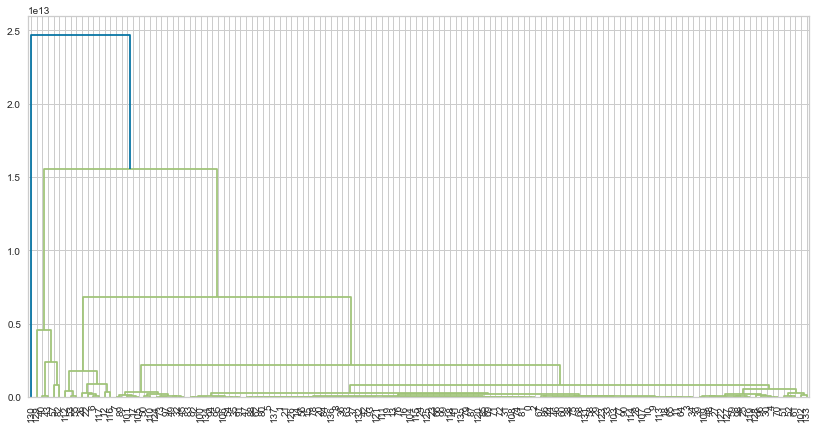

In [1011]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

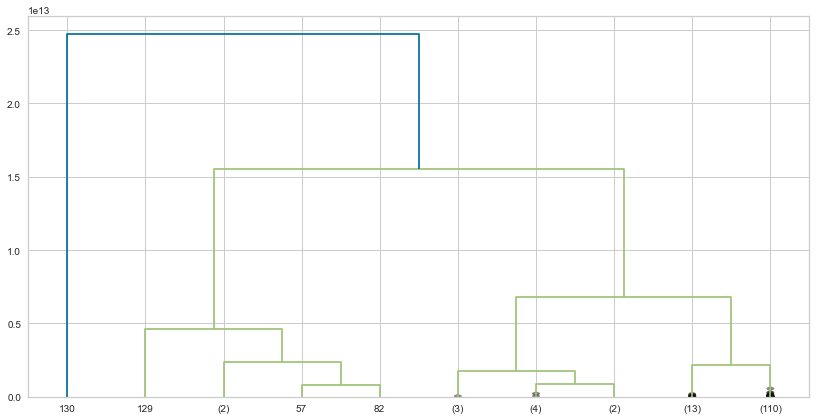

In [1012]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

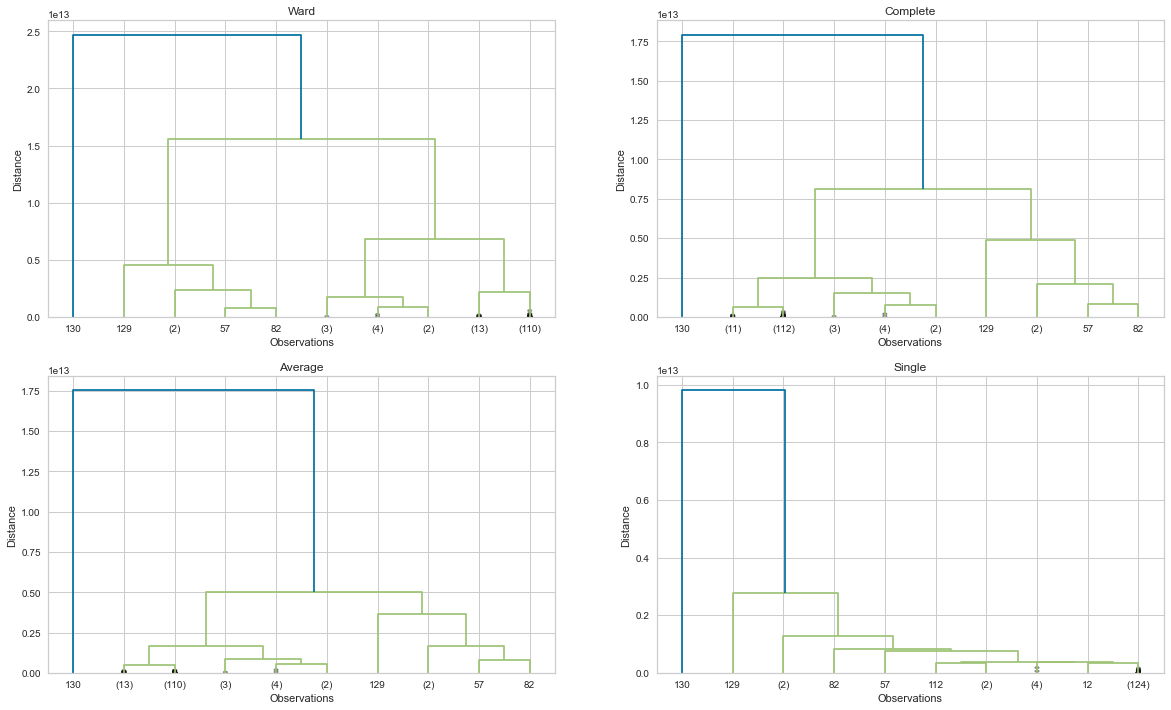

In [1013]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

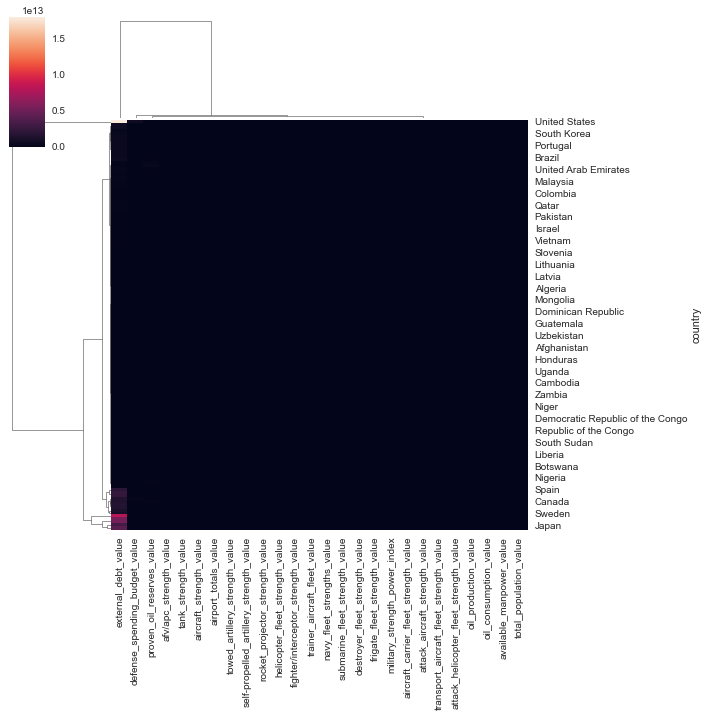

In [1014]:
sns.clustermap(df2);

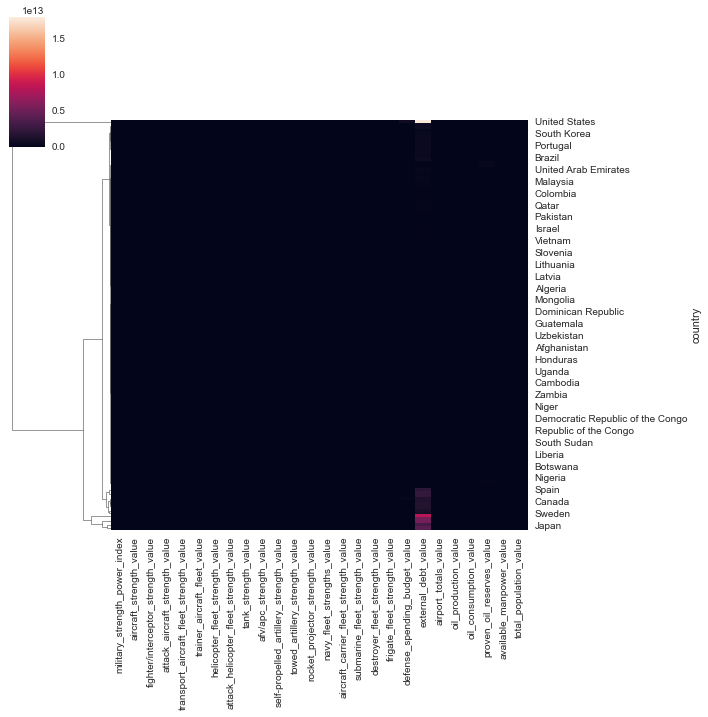

In [1015]:
sns.clustermap(df2, col_cluster=False);

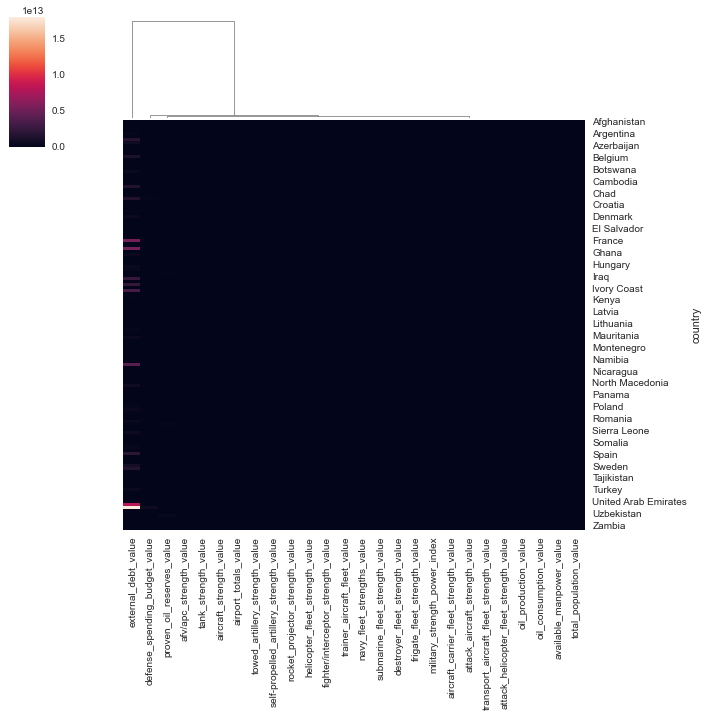

In [1016]:
sns.clustermap(df2, row_cluster=False);

### Model Building and label visualisation

In [1017]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

In [1018]:
from sklearn.metrics import silhouette_score

In [1019]:
K = range(2,10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                    affinity='euclidean', 
                                    linkage='ward').fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model_labels)}')

Silhouette Score for 2 clusters: 0.8455107334057902
Silhouette Score for 3 clusters: 0.8178018574437472
Silhouette Score for 4 clusters: 0.8064895375260924
Silhouette Score for 5 clusters: 0.33624592581229146
Silhouette Score for 6 clusters: 0.3480186913192134
Silhouette Score for 7 clusters: 0.3463483299832806
Silhouette Score for 8 clusters: 0.3457615120949605
Silhouette Score for 9 clusters: 0.33252310675793867


In [1020]:
model = AgglomerativeClustering(n_clusters = 5,
                                affinity='euclidean',
                                linkage='ward')

In [1021]:
clusters = model.fit_predict(X_scaled)

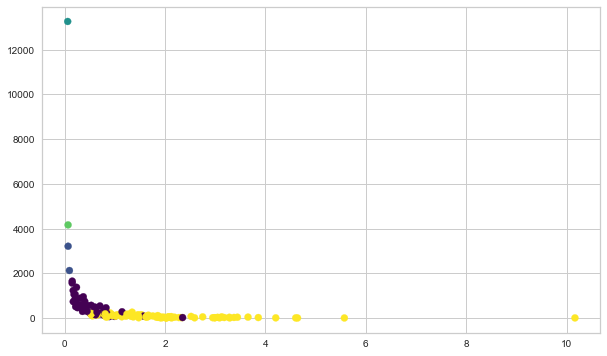

In [1022]:
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c = clusters, cmap = "viridis")

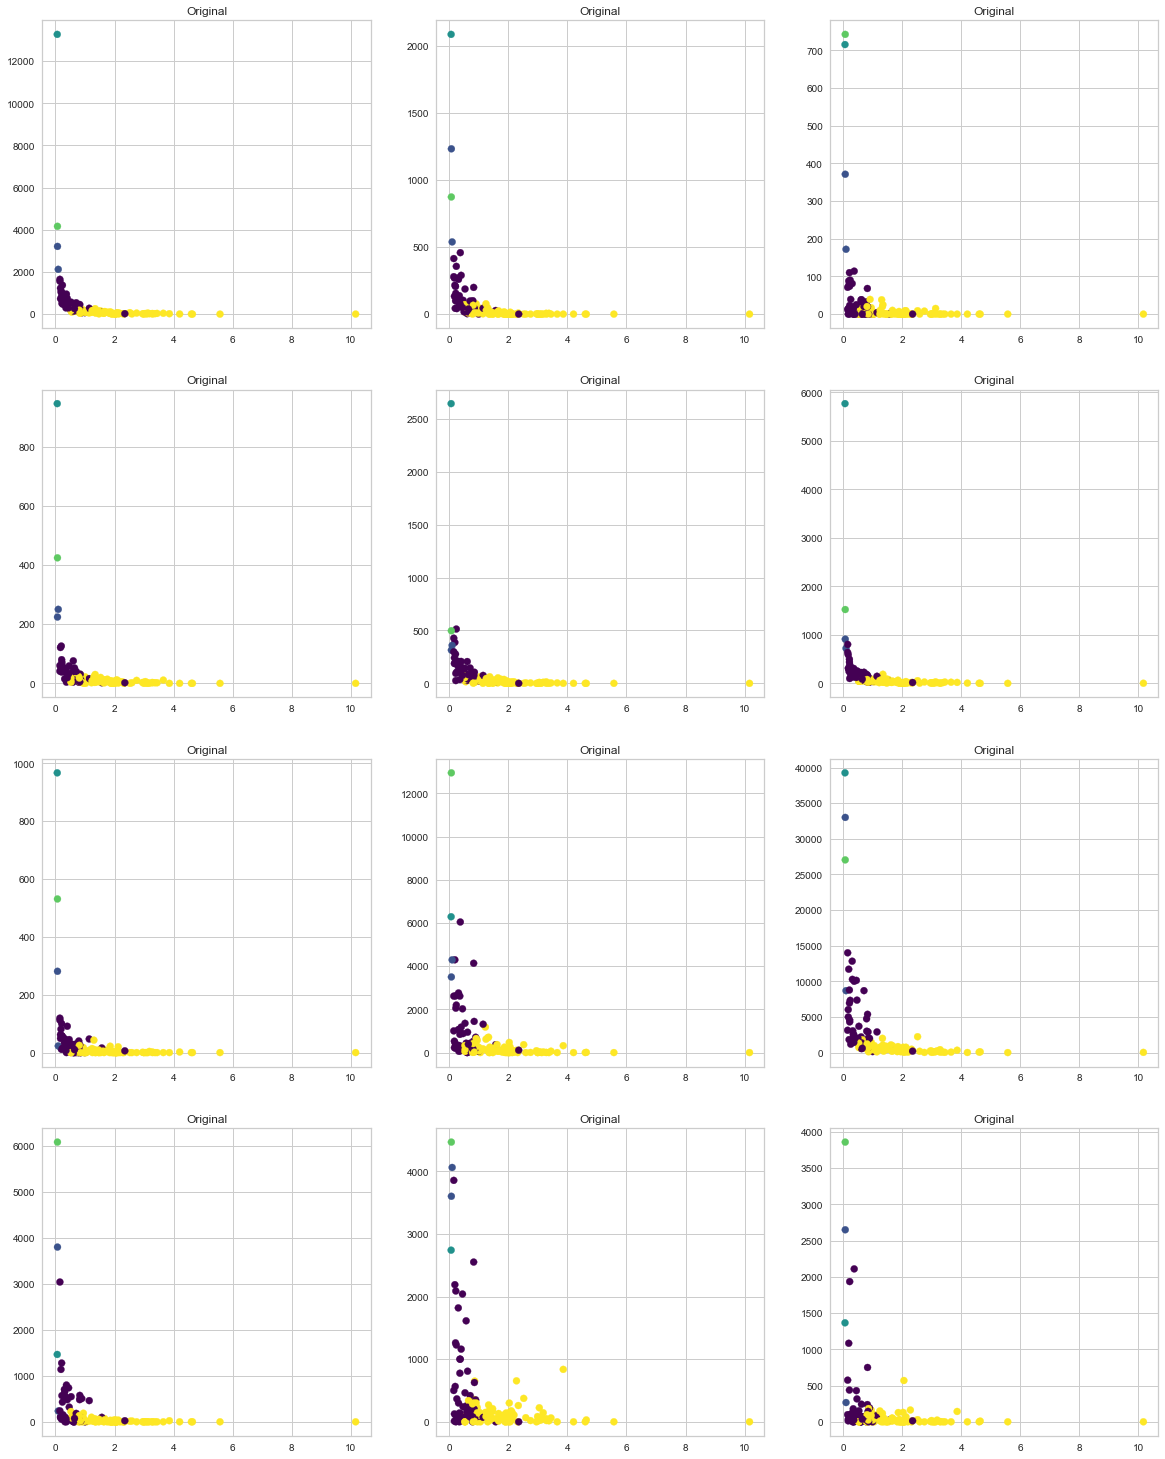

In [1023]:
plt.figure(figsize = (20,60))

plt.subplot(9,3,1)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c = clusters, cmap = "viridis");
plt.subplot(9,3,2)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,2], c = clusters, cmap = "viridis");
plt.subplot(9,3,3)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,3], c = clusters, cmap = "viridis");
plt.subplot(9,3,4)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,4], c = clusters, cmap = "viridis");
plt.subplot(9,3,5)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,5], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,6)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,6], c = clusters, cmap = "viridis");
plt.subplot(9,3,7)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,7], c = clusters, cmap = "viridis");
plt.subplot(9,3,8)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,8], c = clusters, cmap = "viridis");
plt.subplot(9,3,9)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,9], c = clusters, cmap = "viridis");
plt.subplot(9,3,10)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,10], c = clusters, cmap = "viridis");
plt.subplot(9,3,11)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,11], c = clusters, cmap = "viridis");
plt.subplot(9,3,12)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,12], c = clusters, cmap = "viridis");

In [1024]:
df2["predicted_clusters_hc"] = clusters

In [1025]:
df2.head()

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   
Albania                              2.314                       19   
Algeria                              0.466                      551   
Angola                               0.838                      295   
Argentina                            0.652                      227   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   
Albania                                       0   
Algeria                                     103   
Angola                                       72   
Argentina                                    24   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   
Albania                                   0   
Algeria                                  22   
Angola                                   18   
Argentina                                 7   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   
Albania                                            0   
Algeria                                           59   
Angola                                            30   
Argentina                                          9   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   
Albania                                 0                               19   
Algeria                                87                              257   
Angola                                 47                              126   
Argentina                              64                              100   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   
Albania                                           0                    0   
Algeria                                          45                  880   
Angola                                           15                  379   
Argentina                                         0                  370   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   
Albania                         467                                        0   
Algeria                        7361                                      320   
Angola                          595                                       28   
Argentina                       739                                       83   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   
Albania                                   0                                0   
Algeria                                 240                              316   
Angola                                  357                              115   
Argentina                               172                               26   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   
Albania                          38.000   
Algeria                         201.000   
Angola           

In [1026]:
df2.groupby("predicted_clusters_hc").mean()

military_strength_power_index  aircraft_strength_value  \
predicted_clusters_hc                                                           
0                                              0.568                  499.980   
1                                              0.082                 2666.500   
2                                              0.061                13264.000   
3                                              0.068                 4163.000   
4                                              2.058                   69.643   

                       fighter/interceptor_strength_value  \
predicted_clusters_hc                                       
0                                                 110.720   
1                                                 885.000   
2                                                2085.000   
3                                                 873.000   
4                                                  11.810   

                       attack_aircraft_strength_value  \
predicted_clusters_hc                                   
0                                              23.800   
1                                             271.500   
2                                             715.000   
3                                             742.000   
4                                               4.345   

                       transport_aircraft_fleet_strength_value  \
predicted_clusters_hc                                            
0                                                       35.220   
1                                                      237.000   
2                                                      945.000   
3                                                      424.000   
4                                                        6.762   

                       trainer_aircraft_fleet_value  \
predicted_clusters_hc                                 
0                                           127.200   
1                                           336.500   
2                                          2643.000   
3                                           497.000   
4                                            14.976   

                       helicopter_fleet_strength_value  \
predicted_clusters_hc                                    
0                                              194.380   
1                                              816.500   
2                                             5768.000   
3                                             1522.000   
4                                               31.179   

                       attack_helicopter_fleet_strength_value  \
predicted_clusters_hc                                           
0                                                      28.380   
1                                                     152.000   
2                                                     967.000   
3                                                     531.000   
4                                                       3.750   

                       tank_strength_value  afv/apc_strength_value  \
predicted_clusters_hc                                                
0                                  995.860                3896.920   
1                                 3896.000               20843.000   
2                                 6289.000               39253.000   
3                                12950.000               27038.000   
4                                  147.643                 478.607   

                       self-propelled_artillery_strength_value  \
predicted_clusters_hc                                            
0                                                      315.120   
1                                                     2017.500   
2                                                     1465.000   
3                                                     6083.000   
4                           

In [1027]:
# plt.figure(figsize = (20,6))

# plt.subplot(131)
# sns.boxplot(y = "Murder", x = "predicted_clusters", data = df)

# plt.subplot(132)
# sns.boxplot(y = "Assault", x = "predicted_clusters", data = df)

# plt.subplot(133)
# sns.boxplot(y = "Rape", x = "predicted_clusters", data = df);

In [1028]:
df2.predicted_clusters_hc.value_counts()

4    84
0    50
1     2
2     1
3     1
Name: predicted_clusters_hc, dtype: int64

In [1029]:
df2[df2["predicted_clusters_hc"]==0].index

Index(['Algeria', 'Australia', 'Bangladesh', 'Belarus', 'Bolivia', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Denmark', 'Egypt',
       'Finland', 'France', 'Germany', 'Greece', 'Indonesia', 'Iran', 'Iraq',
       'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait', 'Malaysia', 'Mexico',
       'Morocco', 'Myanmar', 'Netherlands', 'North Korea', 'Pakistan', 'Peru',
       'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'Singapore',
       'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Syria',
       'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'Venezuela', 'Vietnam'],
      dtype='object', name='country')

In [1030]:
df2[df2["predicted_clusters_hc"]==1].index

Index(['China', 'India'], dtype='object', name='country')

In [1031]:
df2[df2["predicted_clusters_hc"]==2].index

Index(['United States'], dtype='object', name='country')

In [1032]:
df2[df2["predicted_clusters_hc"]==3].index

Index(['Russia'], dtype='object', name='country')

In [1033]:
df2[df2["predicted_clusters_hc"]==4].index

Index(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Belgium', 'Bhutan', 'Bosnia and Herzegovina',
       'Botswana', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Croatia', 'Cuba', 'Czechia',
       'Democratic Republic of the Congo', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Ethiopia', 'Gabon', 'Georgia', 'Ghana',
       'Guatemala', 'Honduras', 'Hungary', 'Ireland', 'Ivory Coast',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Liberia', 'Libya', 'Lithuania', 'Madagascar', 'Mali', 'Mauritania',
       'Moldova', 'Mongolia', 'Montenegro', 'Mozambique', 'Namibia', 'Nepal',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia',
       'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Qatar',
       'Republic of the Congo', 'Serbia', 'Sierra Leone', 'Slovakia',
       'Slovenia', 'Somalia', 'Sri Lanka', 'Sudan'

### Evaluate 

In [1034]:
df2["military_power"] = df2["predicted_clusters_hc"].map({  0 : "low",
                                                            1 : "medium",
                                                            2 : "most_powerful",
                                                            3 : "powerfull",
                                                            4 : "very_low",
                                                         })

In [1035]:
df2.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                         0.000                12000000000.000   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan       2840000000.000                    43                 0.000   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan               5500.000                      0.000   

             available_manpower_value  total_population_value  \
country                                                         
Afghanistan              14325743.000            34940837.000   

             predicted_clusters_hc military_power  
country                                            
Afghanistan                      4       very_low

In [1036]:
df2.reset_index(inplace=True)

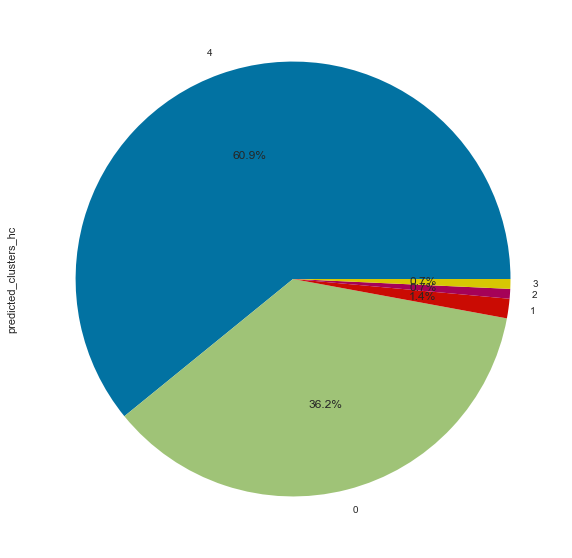

In [1037]:
df2["predicted_clusters_hc"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

In [1038]:
df2.predicted_clusters_hc.value_counts()

4    84
0    50
1     2
2     1
3     1
Name: predicted_clusters_hc, dtype: int64

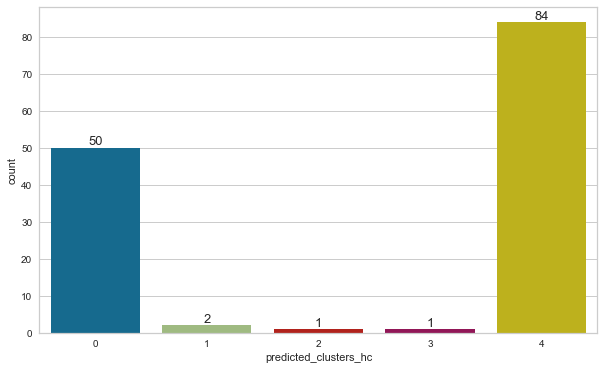

In [1039]:
df2.predicted_clusters_hc.value_counts()

sns.countplot(x=df2["predicted_clusters_hc"], data=df2)
for index,value in enumerate(df2.predicted_clusters_hc.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [1040]:
df2.groupby("predicted_clusters_hc")["country"].unique()

predicted_clusters_hc
0    [Algeria, Australia, Bangladesh, Belarus, Bolivia, Brazil, Bulgaria, Canada, Chile, Colombia, Denmark, Egypt, Finland, France, Germany, Greece, Indonesia, Iran, Iraq, Israel, Italy, Japan, Jordan,...
1                                                                                                                                                                                             [China, India]
2                                                                                                                                                                                            [United States]
3                                                                                                                                                                                                   [Russia]
4    [Afghanistan, Albania, Angola, Argentina, Armenia, Austria, Azerbaijan, Bahrain, Belgium, Bhutan, Bosnia and Herzegovina, Botswana, Burkina Faso, Cambodi

In [1041]:
df2["military_power"].value_counts()

very_low         84
low              50
medium            2
most_powerful     1
powerfull         1
Name: military_power, dtype: int64

In [1042]:
df2.groupby("military_power")["country"].unique()["very_low"]

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Belgium', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Croatia', 'Cuba',
       'Czechia', 'Democratic Republic of the Congo',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia',
       'Ethiopia', 'Gabon', 'Georgia', 'Ghana', 'Guatemala', 'Honduras',
       'Hungary', 'Ireland', 'Ivory Coast', 'Kazakhstan', 'Kenya',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia', 'Libya',
       'Lithuania', 'Madagascar', 'Mali', 'Mauritania', 'Moldova',
       'Mongolia', 'Montenegro', 'Mozambique', 'Namibia', 'Nepal',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia',
       'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Qatar',
       'Republic of the Congo', 'Serbia', 'Sierra Leone', 'Slovakia',
       'Slovenia', 'Somalia', 'Sri Lanka', 

In [1043]:
df2.groupby("military_power")["country"].unique()["low"]

array(['Algeria', 'Australia', 'Bangladesh', 'Belarus', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Denmark',
       'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Indonesia',
       'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait',
       'Malaysia', 'Mexico', 'Morocco', 'Myanmar', 'Netherlands',
       'North Korea', 'Pakistan', 'Peru', 'Poland', 'Portugal', 'Romania',
       'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea',
       'South Sudan', 'Spain', 'Syria', 'Taiwan', 'Thailand', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Venezuela',
       'Vietnam'], dtype=object)

In [1044]:
df2.groupby("military_power")["country"].unique()["medium"]

array(['China', 'India'], dtype=object)

In [1045]:
df2.groupby("military_power")["country"].unique()["powerfull"]

array(['Russia'], dtype=object)

In [1046]:
df2.groupby("military_power")["country"].unique()["most_powerful"]

array(['United States'], dtype=object)

In [1047]:
df1['military_strength_power_index'].iplot(kind='hist', bins=200)

In [1048]:
def classification1(military_strength_power_index):
    if military_strength_power_index <= 0.065:
        return "most_powerfull"
    elif 0.065 < military_strength_power_index <= 0.070:
        return "powerfull"
    elif 0.070 < military_strength_power_index <= 0.1:
        return "medium"
    elif 0.1 < military_strength_power_index <= 1:
        return "low"
    else:
        return "very_low"

In [1049]:
df.military_strength_power_index.sort_values()

country
United States    0.061
Russia           0.068
China            0.069
India            0.095
Japan            0.150
                 ...  
Sierra Leone     4.206
Suriname         4.604
Somalia          4.640
Liberia          5.574
Bhutan          10.168
Name: military_strength_power_index, Length: 138, dtype: float64

In [1050]:
df2['classification'] = df2['military_strength_power_index'].apply(classification1)

In [1051]:
df2['classification'].value_counts()

very_low          71
low               63
powerfull          2
most_powerfull     1
medium             1
Name: classification, dtype: int64

In [1052]:
df2['military_power'].value_counts()

very_low         84
low              50
medium            2
most_powerful     1
powerfull         1
Name: military_power, dtype: int64

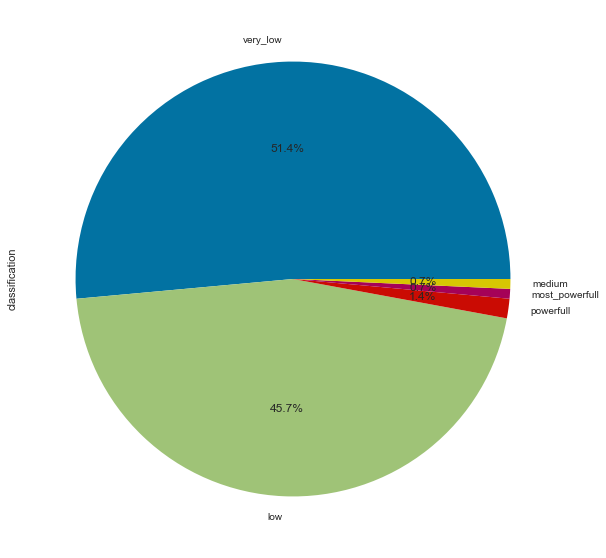

In [1053]:
df2["classification"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

In [1054]:
df2.classification.value_counts()

very_low          71
low               63
powerfull          2
most_powerfull     1
medium             1
Name: classification, dtype: int64

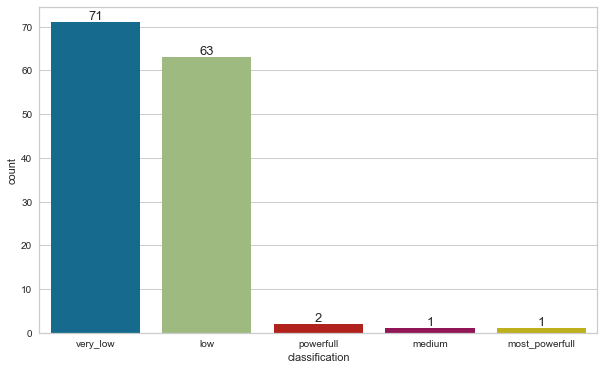

In [1055]:
df2.classification.value_counts()

sns.countplot(x=df2["classification"], data=df2)
for index,value in enumerate(df2.classification.value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [1056]:
df2[["classification", "military_power"]].value_counts()

classification  military_power
very_low        very_low          68
low             low               47
                very_low          16
very_low        low                3
medium          medium             1
most_powerfull  most_powerful      1
powerfull       medium             1
                powerfull          1
dtype: int64

In [1057]:
df2[["country", "classification", "military_power"]]

country classification military_power
0    Afghanistan       very_low       very_low
1        Albania       very_low       very_low
2        Algeria            low            low
3         Angola            low       very_low
4      Argentina            low       very_low
..           ...            ...            ...
133    Venezuela            low            low
134      Vietnam            low            low
135        Yemen       very_low       very_low
136       Zambia       very_low       very_low
137     Zimbabwe       very_low       very_low

[138 rows x 3 columns]

In [1058]:
df2[df2["classification"]!=df2["military_power"]][["country", "classification", "military_power"]]

country  classification military_power
3           Angola             low       very_low
4        Argentina             low       very_low
7          Austria             low       very_low
8       Azerbaijan             low       very_low
26           China       powerfull         medium
30         Czechia             low       very_low
38        Ethiopia             low       very_low
48         Hungary             low       very_low
58          Jordan        very_low            low
59      Kazakhstan             low       very_low
61          Kuwait        very_low            low
86         Nigeria             low       very_low
89          Norway             low       very_low
95     Philippines             low       very_low
103         Serbia             low       very_low
106       Slovakia             low       very_low
111    South Sudan        very_low            low
116         Sweden             low       very_low
117    Switzerland             low       very_low
130  United States  most_powerfull  most_powerful
132     Uzbekistan             low       very_low